# Delta-t 86 

## Dependencies

In [1]:
import numpy as np
import pandas as pd
import json
from eventgraphs import EventGraph
import matplotlib.pyplot as plt

from glob import glob
from collections import defaultdict
import pickle
import networkx as nx

%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Functions For Plotting  

In [3]:
from matplotlib import pylab
import networkx as nx

def save_graph(graph,file_name):
    #initialze Figure
    plt.figure(num=None, figsize=(16, 8), dpi=100)
    plt.axis('off')
    fig = plt.figure(1)
    pos = nx.circular_layout(graph)
    nx.draw_networkx_nodes(graph,pos)
    nx.draw_networkx_edges(graph,pos)
    nx.draw_networkx_labels(graph,pos)
    labels = nx.get_edge_attributes(graph,'delta')
    nx.draw_networkx_edge_labels(graph,pos,edge_labels=labels)

    cut = 1.00
    xmax = cut * max(xx for xx, yy in pos.values()) 
    ymax = cut * max(yy for xx, yy in pos.values()) 
    xmin = cut * min(xx for xx, yy in pos.values()) 
    ymin = cut * min(yy for xx, yy in pos.values()) 
    plt.xlim(1.5*xmin, 1.5*xmax)
    plt.ylim(1.5*ymin, 1.5*ymax)

    plt.savefig(file_name) #bbox_inches="tight"
    pylab.close()
    del fig

In [4]:
from matplotlib import pylab
import networkx as nx
import matplotlib.patches as mpatches

def save_graph_with_colour_with_legend(graph,file_name):
    
    color_map = []
    
    handles_lst = []
    
    for i in graph.nodes(data=True):
        if i[1]['type'] in ('renal_1', 'renal_2', 'renal_3', 'renal_4', 'renal_5'):
            i[1]['type'] = 'renal'
            color_map.append('blue')
            
            if 'blue_patch' not in handles_lst:
                blue_patch = mpatches.Patch(color='blue', label='Renal')
                handles_lst.append(blue_patch)

        elif i[1]['type'] in ('medicine_1', 'medicine_2', 'medicine_3', 'medicine_4', 'medicine_5',' medicine_6',' medicine_7'
                              , 'medicine_8','medicine_9', 'medicine_10', ' medicine_11', 'medicine_12', 'medicine_13', 
                              'medicine_14','medicine_15', 'medicine_16', 'medicine_17', 'medicine_18', 'medicine_19', 
                              'medicine_20', 'medicine_21'):
            i[1]['type'] = 'medicine'
            color_map.append('green')
            
            green_patch = mpatches.Patch(color='green', label='Medicine')
            plt.legend(handles=[green_patch])

        elif i[1]['type'] in ('surgery_1', 'surgery_2', 'surgery_3', 'surgery_4', 'surgery_5',' surgery_6',' surgery_7'
                              , 'surgery_8','surgery_9', 'surgery_10','surgery_11','surgery_12','surgery_13', 'surgery_14'):

            i[1]['type'] = 'surgery'
            color_map.append('red')

            if 'red_patch' not in handles_lst:
                red_patch = mpatches.Patch(color='red', label='Surgery')
                handles_lst.append(red_patch)
            
            
        elif i[1]['type'] in ('elderly_1', 'elderly_2', 'elderly_3', 'elderly_4', 'elderly_5'):

            i[1]['type'] = 'elderly'
            color_map.append('brown')
            
            brown_patch = mpatches.Patch(color='brown', label='elderly')
            plt.legend(handles=[brown_patch])

        elif i[1]['type'] in ('haematology_1', 'haematology_2', 'haematology_3', 'haematology_4'):

            i[1]['type'] = 'haematology'
            color_map.append('orange')
            
            orange_patch = mpatches.Patch(color='orange', label='Haematology')
            plt.legend(handles=[orange_patch])
        
        elif i[1]['type'] in ('oncology_1', 'oncology_2'):
            
            i[1]['type'] = 'oncology'
            color_map.append('yellow')
            
            yellow_patch = mpatches.Patch(color='yellow', label='Oncology')
            plt.legend(handles=[yellow_patch])
            
        elif i[1]['type'] in ('respiratory_1', 'respiratory_2'):
            i[1]['type'] = 'respiratory'
            color_map.append('black')
        
            black_patch = mpatches.Patch(color='black', label='Respiratory')
            plt.legend(handles=[black_patch])
            
            
        elif i[1]['type'] in ('critical care_1', 'critical care_2', 'critical care_3'):

            i[1]['type'] = 'critical care'
            color_map.append('grey')
            
            grey_patch = mpatches.Patch(color='grey', label='Critical Care')
            plt.legend(handles=[grey_patch])
        
        elif i[1]['type'] in ('cardiology', 'ward na', 'cancer_1', 'OPD_1'):

            i[1]['type'] = 'cardiology/ward_na/cancer_1/OPD_1'
            color_map.append('yellow green')
            white_patch = mpatches.Patch(color='yellow green', label='Cardiology/Ward_na/Cancer_1/OPD_1')
            plt.legend(handles=[white_patch])
        else:
            color_map.append('purple')
            purple_patch = mpatches.Patch(color='purple', label='Other')
            plt.legend(handles=[purple_patch])
            continue
            
    
    
    
    
    #initialze Figure
    plt.figure(num=None, figsize=(16, 8), dpi=100)
    plt.axis('off')
    fig = plt.figure(1)
    pos = nx.circular_layout(graph)
    nx.draw_networkx_nodes(graph,pos)
    nx.draw_networkx_edges(graph,pos)
    nx.draw_networkx_labels(graph,pos)
    labels = nx.get_edge_attributes(graph,'delta')
    #nx.draw_networkx_edge_labels(graph,pos,edge_labels=labels)
   
    nx.draw(graph,pos, edge_labels=labels, node_color=color_map)

    cut = 1.00
    xmax = cut * max(xx for xx, yy in pos.values()) 
    ymax = cut * max(yy for xx, yy in pos.values()) 
    xmin = cut * min(xx for xx, yy in pos.values()) 
    ymin = cut * min(yy for xx, yy in pos.values()) 
    plt.xlim(1.5*xmin, 1.5*xmax)
    plt.ylim(1.5*ymin, 1.5*ymax)
    
    
    plt.legend(handles=handles_lst)
    
    print(handles_lst)
    plt.savefig(file_name) #bbox_inches="tight"
    pylab.close()
    del fig

In [5]:
from matplotlib import pylab
import networkx as nx
import matplotlib.patches as mpatches

def save_graph_with_colour(graph,file_name):
    
    color_map = []
    
    handles_lst = []
    
    for i in graph.nodes(data=True):
        if i[1]['type'] in ('renal_1', 'renal_2', 'renal_3', 'renal_4', 'renal_5'):
            i[1]['type'] = 'renal'
            color_map.append('blue')

        elif i[1]['type'] in ('medicine_1', 'medicine_2', 'medicine_3', 'medicine_4', 'medicine_5',' medicine_6',' medicine_7'
                              , 'medicine_8','medicine_9', 'medicine_10', ' medicine_11', 'medicine_12', 'medicine_13', 
                              'medicine_14','medicine_15', 'medicine_16', 'medicine_17', 'medicine_18', 'medicine_19', 
                              'medicine_20', 'medicine_21'):
            i[1]['type'] = 'medicine'
            color_map.append('green')
            
        elif i[1]['type'] in ('surgery_1', 'surgery_2', 'surgery_3', 'surgery_4', 'surgery_5',' surgery_6',' surgery_7'
                              , 'surgery_8','surgery_9', 'surgery_10','surgery_11','surgery_12','surgery_13', 'surgery_14'):

            i[1]['type'] = 'surgery'
            color_map.append('red')
            
            
        elif i[1]['type'] in ('elderly_1', 'elderly_2', 'elderly_3', 'elderly_4', 'elderly_5'):

            i[1]['type'] = 'elderly'
            color_map.append('brown')
            
            
        elif i[1]['type'] in ('haematology_1', 'haematology_2', 'haematology_3', 'haematology_4'):

            i[1]['type'] = 'haematology'
            color_map.append('orange')
            
            
        
        elif i[1]['type'] in ('oncology_1', 'oncology_2'):
            
            i[1]['type'] = 'oncology'
            color_map.append('yellow')
            
            
            
        elif i[1]['type'] in ('respiratory_1', 'respiratory_2'):
            i[1]['type'] = 'respiratory'
            color_map.append('grey')
        
            
            
        elif i[1]['type'] in ('critical care_1', 'critical care_2', 'critical care_3'):

            i[1]['type'] = 'critical care'
            color_map.append('black')
            
            
        
        elif i[1]['type'] in ('cardiology', 'ward na', 'cancer_1', 'OPD_1'):

            i[1]['type'] = 'cardiology/ward_na/cancer_1/OPD_1'
            color_map.append('white')
            
        else:
            color_map.append('purple')
            continue
            
    
    
    
    
    #initialze Figure
    plt.figure(num=None, figsize=(16, 8), dpi=100)
    plt.axis('off')
    fig = plt.figure(1)
    pos = nx.circular_layout(graph)
    nx.draw_networkx_nodes(graph,pos)
    nx.draw_networkx_edges(graph,pos)
    nx.draw_networkx_labels(graph,pos)
    labels = nx.get_edge_attributes(graph,'delta')
    #nx.draw_networkx_edge_labels(graph,pos,edge_labels=labels)
   
    nx.draw(graph,pos, edge_labels=labels, node_color=color_map)

    cut = 1.00
    xmax = cut * max(xx for xx, yy in pos.values()) 
    ymax = cut * max(yy for xx, yy in pos.values()) 
    xmin = cut * min(xx for xx, yy in pos.values()) 
    ymin = cut * min(yy for xx, yy in pos.values()) 
    plt.xlim(1.5*xmin, 1.5*xmax)
    plt.ylim(1.5*ymin, 1.5*ymax)
    
    
    plt.legend(handles=handles_lst)
    
    print(handles_lst)
    plt.savefig(file_name) #bbox_inches="tight"
    pylab.close()
    del fig

In [6]:
PLOT_STYLE = {'lines.linewidth':2,
              'font.size':16,
              'xtick.labelsize':16,
              'ytick.labelsize':16,
              'axes.labelsize' : 16,
              'mathtext.fontset':'cm',
              'mathtext.rm' :'serif',
              'text.usetex':False
             }

In [10]:
home_dir = "C:\\Users\\matth\\Documents\\IMPERIAL\\PROJECT\\timestamped_data.csv"

df = pd.read_csv(home_dir)

In [11]:
df.head()

,source,target,time,type
0,PtNum_rvket6d83b465rvket,PtNum_rvket1a4b3d57rvket,3,renal_5
1,PtNum_rvket2f0c7655rvket,PtNum_rvket1e1e94farvket,11,renal_4
2,PtNum_rvket2cfb6889rvket,PtNum_rvket25f41af7rvket,3,medicine_2
3,PtNum_rvket2cfb6889rvket,PtNum_rvket25f41af7rvket,4,medicine_2
4,PtNum_rvket2cfb6889rvket,PtNum_rvket25f41af7rvket,9,respiratory_2


## Event Graph Creation

In [12]:
EG_86 = EventGraph.from_pandas_eventlist(df, graph_rules='teg')
EG_86.event_graph_rules['delta_cutoff'] = 86 #days
EG_86.build(verbose=False)
EG_86.calculate_edge_motifs() # in order to include_graph_data
nx_eg_86 = EG_86.create_networkx_event_graph(include_graph_data=True)

In [13]:
z = pd.Series(EG_86.connected_components_indices()).value_counts()
print("Number of connected components: {}".format(len(z)))
print("Number of connected components (with more than 4 events): {}".format(len(z[z>4])))

Number of connected components: 252
Number of connected components (with more than 4 events): 106


In [14]:
df['type'].value_counts()

surgery_1                336
renal_5                  200
Ward_na                  128
renal_4                  120
elderly_3                 68
elderly_4                 59
haematology_1             49
elderly_1                 45
oncology_2                44
respiratory_2             43
elderly_5                 38
medicine_10               35
renal_2                   34
infectious diseases_1     33
medicine_13               33
elderly_2                 33
renal_3                   28
medicine_4                27
medicine_8                17
respiratory_1             15
medicine_7                14
renal_1                   13
surgery_12                13
medicine_9                12
medicine_17               11
critical care_5           11
haematology_4             11
medicine_2                11
medicine_6                11
surgery_8                 11
paediatrics_2             10
cardiology_4              10
cancer_1                   7
surgery_5                  7
medicine_3    

# Feature Generation

In [15]:
#filtering the event graph to only the connect components with greater than 4 events

filtered = EG_86.filter_edges(delta_ub=86)

In [16]:
# basis composition
print(f'Nodes:',filtered.N)
print(f'Events:',filtered.M)
print(f'Duration:',filtered.D)

Nodes: 363
Events: 1608
Duration: 651


In [17]:
from eventgraphs.clustering import generate_features, FEATURE_SPEC

components = filtered.connected_components(min_size=5)
print(f'The Number of components with greater than four events', len(components))


The Number of components with greater than four events 106


In [18]:
#set the kwargs to be passed to the function


FEATURE_SPEC['event_graph_features'][1]['kwargs'] = {'miller_correct':False, 'k':24}
FEATURE_SPEC['event_graph_features'][2]['kwargs'] = {'miller_correct':False, 'divisions':10}
FEATURE_SPEC['event_graph_features']

[{'name': 'motifs',
  'function': <function eventgraphs.analysis.calculate_motif_distribution(eventgraph, normalize=True)>,
  'kwargs': {},
  'scale': False},
 {'name': 'motif_entropy',
  'function': <function eventgraphs.analysis.calculate_motif_entropy(eventgraph, miller_correct=False, k=None, normalize=False)>,
  'kwargs': {'miller_correct': False, 'k': 24},
  'scale': False},
 {'name': 'iet_entropy',
  'function': <function eventgraphs.analysis.calculate_iet_entropy(eventgraph, normalize=True, miller_correct=False, divisions=10)>,
  'kwargs': {'miller_correct': False, 'divisions': 10},
  'scale': False},
 {'name': 'activity',
  'function': <function eventgraphs.analysis.calculate_activity(eventgraph, unit=1, rescale=True)>,
  'kwargs': {},
  'scale': False},
 {'name': 'duration',
  'function': <function eventgraphs.clustering.<lambda>(eventgraph)>,
  'kwargs': {},
  'scale': True},
 {'name': 'num_events',
  'function': <function eventgraphs.clustering.<lambda>(eventgraph)>,
  'kwar

These are the (SIX) different (TWO-EVENT) motif representation:

+|○ : ABCB

+|● : ABCA

○|● : ABBA 

○|+ : ABBC

●|○ : ABAB

●|+ : ABAC

## motif Distribution

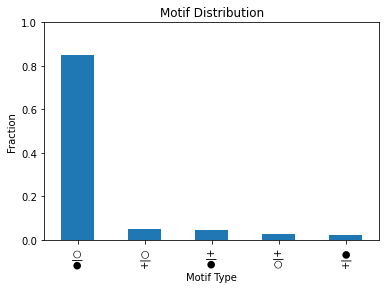

In [19]:
from eventgraphs.analysis import calculate_motif_distribution

motif_distribution = calculate_motif_distribution(filtered)

motif_distribution.nlargest().plot(kind='bar', ylim=(0,1), title='Motif Distribution', xlabel='Motif Type', 
                                   ylabel='Fraction');

In [20]:
motif_distribution_df = pd.DataFrame(motif_distribution)

In [21]:
motif_distribution_df.index

Index(['●|○', '+|○', '●|+', '○|+', '+|●'], dtype='object')

In [22]:
motif_distribution_df =motif_distribution_df.rename(index={'●|○': 'ABAB', '+|○': 'ABCB', '●|+':'ABAC','○|+':' ABBC', '+|●':'ABCA'})

<AxesSubplot:title={'center':'CPE: Motif Distribution'}, xlabel='Motif Type', ylabel='Fraction'>

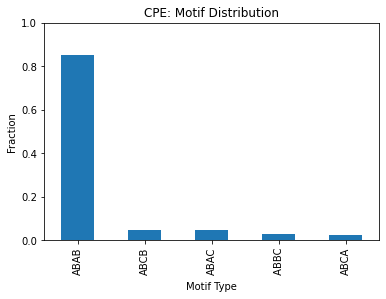

In [23]:
motif_distribution_df.plot.bar(ylim=(0,1), title='CPE: Motif Distribution', xlabel='Motif Type', 
                                   ylabel='Fraction', legend=None)


In [24]:
from eventgraphs.analysis import calculate_iet_distribution

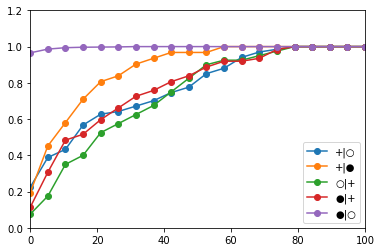

In [25]:
motif_iets = calculate_iet_distribution(filtered, 
                                        by_motif=True, 
                                        normalize=True, 
                                        cumulative=True,
                                        bins=np.linspace(0,100,20))

for motif, times in motif_iets.items():
    if motif in motif_distribution.nlargest():
        times.plot(xlim=(0,100), 
                   ylim=(0,1.2), 
                   label=motif, 
                   logx=False, 
                   legend=True,
                   figsize=(6,4),
                   marker='o')

## Creating features

In [27]:
features, scale_features = generate_features(components, feature_spec=FEATURE_SPEC)

In [28]:
features.keys()

Index(['●|○', '○|+', '●|+', '+|○', '+|●', 'motif_entropy', 'iet_entropy',
       'activity', 'clustering_coefficient', 'reciprocity_ratio',
       'imbalance_oo', 'imbalance_oi', 'imbalance_ii'],
      dtype='object')

In [29]:
features

,●|○,○|+,●|+,+|○,+|●,motif_entropy,iet_entropy,activity,clustering_coefficient,reciprocity_ratio,imbalance_oo,imbalance_oi,imbalance_ii
87,0.666667,0.090909,0.090909,0.090909,0.060606,1.578571,0.368247,0.206493,0.000000,0.0,0.638889,0.541667,0.388889
99,0.939394,0.000000,0.000000,0.030303,0.030303,0.390452,0.117538,0.360692,0.000000,0.0,0.833333,0.166667,0.166667
1,0.757576,0.000000,0.060606,0.060606,0.121212,1.162685,0.217645,0.455094,0.316667,0.0,0.722222,0.425926,0.333333
152,0.833333,0.000000,0.033333,0.066667,0.066667,0.903677,0.188894,0.245589,0.000000,0.0,0.666667,0.333333,0.277778
62,0.766667,0.033333,0.066667,0.100000,0.033333,1.213664,0.292103,0.243671,0.000000,0.0,0.645833,0.500000,0.354167
...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,1.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,0.713495,0.000000,0.0,1.000000,0.500000,0.000000
13,0.750000,0.000000,0.250000,0.000000,0.000000,0.811278,0.244219,0.086899,0.000000,0.0,1.000000,1.000000,0.000000
73,0.500000,0.000000,0.500000,0.000000,0.000000,1.000000,0.451545,0.254811,0.000000,0.0,1.000000,1.000000,0.000000
41,1.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,0.713495,0.000000,0.0,1.000000,0.500000,0.000000


In [28]:
components

{87: <EventGraph with 13 nodes, 34 events, and 33 edges (status: built)>,
 99: <EventGraph with 4 nodes, 34 events, and 33 edges (status: built)>,
 1: <EventGraph with 8 nodes, 34 events, and 33 edges (status: built)>,
 152: <EventGraph with 7 nodes, 31 events, and 30 edges (status: built)>,
 62: <EventGraph with 9 nodes, 31 events, and 30 edges (status: built)>,
 220: <EventGraph with 7 nodes, 28 events, and 27 edges (status: built)>,
 36: <EventGraph with 5 nodes, 28 events, and 27 edges (status: built)>,
 197: <EventGraph with 7 nodes, 25 events, and 24 edges (status: built)>,
 17: <EventGraph with 5 nodes, 24 events, and 23 edges (status: built)>,
 223: <EventGraph with 3 nodes, 23 events, and 22 edges (status: built)>,
 3: <EventGraph with 5 nodes, 21 events, and 20 edges (status: built)>,
 123: <EventGraph with 3 nodes, 20 events, and 19 edges (status: built)>,
 246: <EventGraph with 2 nodes, 19 events, and 18 edges (status: built)>,
 101: <EventGraph with 3 nodes, 19 events, and

In [30]:
features['reciprocity_ratio'].value_counts().head()

0.0    106
Name: reciprocity_ratio, dtype: int64

In [31]:
#we have no edge reciprocity ie no ABBA due to the nature of the event graph so remove column
features = features.drop('reciprocity_ratio', axis=1)

In [32]:
features.shape

(106, 12)

In [33]:
from sklearn.preprocessing import Normalizer

In [34]:
# Rescale
rs_features = Normalizer().fit_transform(features)
rs_features = pd.DataFrame(rs_features, index=features.index, columns=features.columns)

# Clustering

In [65]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from eventgraphs.clustering import find_clusters

In [66]:
silh_scores = {}
Dunn_scores = {}
cali_hara_scores = {}
#we iterate through different cluster sizes then will work out the best one
for cluster_size in range(2,12):
    clusters, cluster_centers = find_clusters(rs_features, max_clusters=cluster_size, metric='euclidean') #using defult WARD
    #compute metrics
    silh_scores[cluster_size] = silhouette_score(rs_features, clusters)
    Dunn_scores[cluster_size] = davies_bouldin_score(rs_features, clusters)
    cali_hara_scores[cluster_size] = calinski_harabasz_score(rs_features, clusters)
#save to a series
silh_scores = pd.Series(silh_scores)
Dunn_scores = pd.Series(Dunn_scores)
cali_hara_scores = pd.Series(cali_hara_scores)

In [67]:
PLOT_STYLE = {'lines.linewidth':2,
              'font.size':16,
              'xtick.labelsize':16,
              'ytick.labelsize':16,
              'axes.labelsize' : 16,
              'mathtext.fontset':'cm',
              'mathtext.rm' :'serif',
              'text.usetex':False
             }

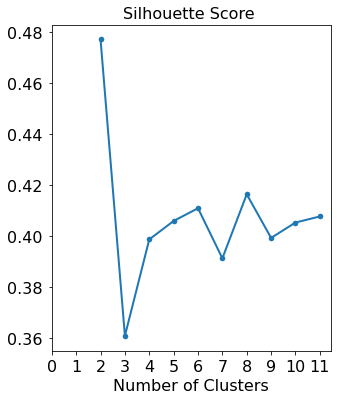

In [68]:
with plt.style.context(['seaborn-paper', PLOT_STYLE]):

    fig = plt.figure(figsize=(5,6))
    ax = fig.add_subplot(111)

    silh_scores.plot(marker='o', ax=ax)

    ax.set_xlabel("Number of Clusters")
    #ax.set_ylabel("Silhouette Score")

    #ax.set_xlim(0,12)
    #ax.set_ylim(0.15,0.33)

    ax.set_xticks(np.arange(0,12,1));
    ax.set_title('Silhouette Score ', fontsize=16)
    fig.savefig('./figures/figure_a2a_clusters.eps', bbox_inches='tight')

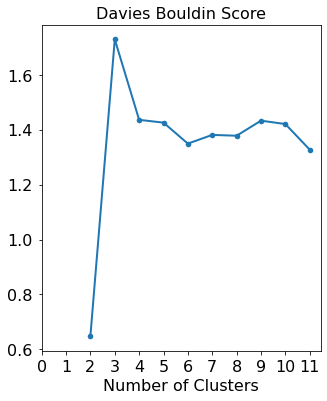

In [69]:
with plt.style.context(['seaborn-paper', PLOT_STYLE]):

    fig = plt.figure(figsize=(5,6))
    ax = fig.add_subplot(111)

    Dunn_scores.plot(marker='o', ax=ax)

    ax.set_xlabel("Number of Clusters")
    ax.set_title("Davies Bouldin Score", fontsize=16)

    #ax.set_xlim(0,12)
    #ax.set_ylim(0.15,0.33)

    ax.set_xticks(np.arange(0,12,1));

    fig.savefig('./figures/figure_a2a_clusters.eps', bbox_inches='tight')

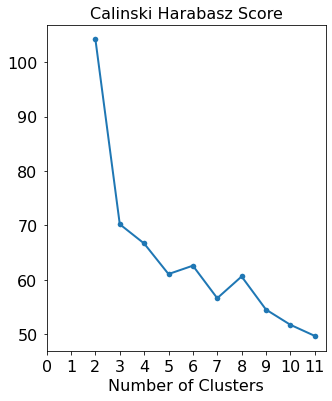

In [70]:
with plt.style.context(['seaborn-paper', PLOT_STYLE]):

    fig = plt.figure(figsize=(5,6))
    ax = fig.add_subplot(111)

    cali_hara_scores.plot(marker='o', ax=ax)

    ax.set_xlabel("Number of Clusters")
    ax.set_title("Calinski Harabasz Score", fontsize=16)

    #ax.set_xlim(0,12)
    #ax.set_ylim(0.15,0.33)

    ax.set_xticks(np.arange(0,12,1));

    fig.savefig('./figures/figure_a2a_clusters.eps', bbox_inches='tight')

## Set number of clusters to be SIX

In [71]:
max_clusters = 6 # set for both analysis with and without outlier

#attain clustering for max_clusters
clusters, cluster_centers = find_clusters(rs_features, max_clusters=max_clusters, metric='euclidean')
filtered.add_cluster_assignments(clusters)

In [72]:
cluster_lst_event = clusters.tolist()

In [73]:
%store cluster_lst_event

Stored 'cluster_lst_event' (list)


In [74]:
#create a summary table of each cluster by mean

summary = pd.concat([features.groupby(by=clusters).mean(),
                     scale_features.groupby(by=clusters).mean()],
                     axis=1)

variances = pd.concat([features.groupby(by=clusters).std(),
                     scale_features.groupby(by=clusters).std()],
                     axis=1)

def reduce_motif(motif):
    if motif.startswith('○|●'):
        return 'ABBA'
    elif motif.startswith('●|+'):
        return 'ABAC'
    elif motif.startswith('○|+'):
        return 'ABBC'
    elif motif.startswith('+|●'):
        return 'ABCA'
    elif motif.startswith('+|○'):
        return 'ABCB'
    elif motif.startswith('●|○'):
        return 'ABAB'
    else:
        return motif 
    
summary = summary.T.reset_index()
summary = summary.groupby(by=summary['index'].apply(reduce_motif)).sum()

# Transform back to original features (rather than normalised) for easier comparison
summary.loc['activity'] = -np.log(1-summary.loc['activity'])
for f in ('ii','oi','oo'):
    summary.loc['imbalance_{}'.format(f)] = 2*summary.loc['imbalance_{}'.format(f)] - 1
summary.loc['iet_entropy'] = summary.loc['iet_entropy']*np.log2(10)
summary.loc['motif_entropy'] = summary.loc['motif_entropy']*np.log2(5) # five because we have six motifs
    
summary = pd.DataFrame(summary)
summary

,1,2,3,4,5,6
index,,,,,,
ABAB,1.000000,0.753996,0.608353,0.817137,0.862448,0.796940
ABAC,0.000000,0.078355,0.116959,0.012806,0.000000,0.134743
ABBC,0.000000,0.076177,0.141752,0.040717,0.000000,0.005299
ABCA,0.000000,0.005208,0.069077,0.077390,0.002525,0.000000
ABCB,0.000000,0.086264,0.063859,0.051951,0.135027,0.063018
activity,1.036756,0.761396,0.237355,0.381232,0.343558,0.407169
clustering_coefficient,0.000000,0.668155,0.054545,0.017593,0.000000,0.000000
duration,9.702703,43.750000,66.363636,53.722222,49.500000,43.450000
edge_density,0.500000,0.349702,0.188306,0.252183,0.312500,0.263333


In [75]:
summary.index

Index(['ABAB', 'ABAC', 'ABBC', 'ABCA', 'ABCB', 'activity',
       'clustering_coefficient', 'duration', 'edge_density', 'iet_entropy',
       'imbalance_ii', 'imbalance_oi', 'imbalance_oo', 'motif_entropy',
       'num_events', 'num_nodes'],
      dtype='object', name='index')

In [76]:
summary_new = summary.rename(index={'activity': 'Activity', 'clustering_coefficient':'Clustering Coefficient', 
                                    'duration': 'Duration', 'edge_density': 'Edge Density', 'iet_entropy': 'IET Entropy',
                                    'imbalance_ii': 'In-In (Imbalance)', 'imbalance_oi': 'Out-In (Imbalance)',
                                    'imbalance_oo': 'Out-Out (Imbalance)', 'motif_entropy': 'Motif Entropy', 
                                    'num_events': 'Average Number of Events', 'num_nodes':'Average Number of Nodes'})

In [77]:
summary_new

,1,2,3,4,5,6
index,,,,,,
ABAB,1.000000,0.753996,0.608353,0.817137,0.862448,0.796940
ABAC,0.000000,0.078355,0.116959,0.012806,0.000000,0.134743
ABBC,0.000000,0.076177,0.141752,0.040717,0.000000,0.005299
ABCA,0.000000,0.005208,0.069077,0.077390,0.002525,0.000000
ABCB,0.000000,0.086264,0.063859,0.051951,0.135027,0.063018
Activity,1.036756,0.761396,0.237355,0.381232,0.343558,0.407169
Clustering Coefficient,0.000000,0.668155,0.054545,0.017593,0.000000,0.000000
Duration,9.702703,43.750000,66.363636,53.722222,49.500000,43.450000
Edge Density,0.500000,0.349702,0.188306,0.252183,0.312500,0.263333


In [78]:
print(summary_new.to_latex())

\begin{tabular}{lrrrrrr}
\toprule
{} &         1 &          2 &          3 &          4 &          5 &          6 \\
index                    &           &            &            &            &            &            \\
\midrule
ABAB                     &  1.000000 &   0.753996 &   0.608353 &   0.817137 &   0.862448 &   0.796940 \\
ABAC                     &  0.000000 &   0.078355 &   0.116959 &   0.012806 &   0.000000 &   0.134743 \\
ABBC                     &  0.000000 &   0.076177 &   0.141752 &   0.040717 &   0.000000 &   0.005299 \\
ABCA                     &  0.000000 &   0.005208 &   0.069077 &   0.077390 &   0.002525 &   0.000000 \\
ABCB                     &  0.000000 &   0.086264 &   0.063859 &   0.051951 &   0.135027 &   0.063018 \\
Activity                 &  1.036756 &   0.761396 &   0.237355 &   0.381232 &   0.343558 &   0.407169 \\
Clustering Coefficient   &  0.000000 &   0.668155 &   0.054545 &   0.017593 &   0.000000 &   0.000000 \\
Duration                 &  9.7027

In [79]:
def highlight_max(s):
    is_large = s.nlargest(3).values
    return ['background-color: yellow' if v in is_large else '' for v in s]

In [80]:

#summary.style.apply(highlight_max)
high = summary.style.highlight_max(color = 'lightgreen', axis = 1)
#high = summary.style.highlight_min(color = 'red', axis = 1)
high

,1,2,3,4,5,6
index,,,,,,
ABAB,1.000000,0.753996,0.608353,0.817137,0.862448,0.796940
ABAC,0.000000,0.078355,0.116959,0.012806,0.000000,0.134743
ABBC,0.000000,0.076177,0.141752,0.040717,0.000000,0.005299
ABCA,0.000000,0.005208,0.069077,0.077390,0.002525,0.000000
ABCB,0.000000,0.086264,0.063859,0.051951,0.135027,0.063018
activity,1.036756,0.761396,0.237355,0.381232,0.343558,0.407169
clustering_coefficient,0.000000,0.668155,0.054545,0.017593,0.000000,0.000000
duration,9.702703,43.750000,66.363636,53.722222,49.500000,43.450000
edge_density,0.500000,0.349702,0.188306,0.252183,0.312500,0.263333


## PCA

In [81]:
#Feature Space plot
from eventgraphs.clustering import reduce_feature_dimensionality
from eventgraphs.plotting import plot_component_embedding

#t-SNE in 2-D - (function uses sklearn)
X, (tsne, _) = reduce_feature_dimensionality(rs_features, 
                                             ndim=2, 
                                             method='tsne',
                                             return_scalers=True, 
                                             **dict(random_state=0, 
                                                  verbose=True, 
                                                  learning_rate=500),)

#PCA in 3-D
Y, PCA = reduce_feature_dimensionality(rs_features, 
                                       ndim=10,
                                       method='pca', 
                                       return_scalers=True,)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 106 samples in 0.000s...
[t-SNE] Computed neighbors for 106 samples in 0.002s...
[t-SNE] Computed conditional probabilities for sample 106 / 106
[t-SNE] Mean sigma: 0.129077
[t-SNE] KL divergence after 250 iterations with early exaggeration: 54.834644
[t-SNE] KL divergence after 1000 iterations: 0.545351


In [82]:
print("Explained Ratio: {}".format(PCA.explained_variance_ratio_))
print("Total Explained: {}".format(sum(PCA.explained_variance_ratio_)))

Explained Ratio: [0.68919593 0.1296929  0.08578548 0.03506654 0.03078975 0.01089325
 0.00901959 0.0032357  0.00287113 0.00184445]
Total Explained: 0.9983947208517787


In [83]:
s = [0.68919593, 0.1296929,  0.08578548]
print(sum(s))

0.90467431


In [84]:
explained_variances = PCA.explained_variance_ratio_
cum_sum_eigenvalues = np.cumsum(explained_variances)

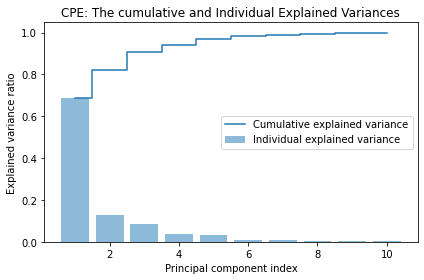

In [85]:
plt.bar(range(1,len(explained_variances) +1), explained_variances, alpha=0.5, align='center',
        label='Individual explained variance')
plt.step(range(1,len(cum_sum_eigenvalues) +1), cum_sum_eigenvalues, where='mid',
         label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.title('CPE: The cumulative and Individual Explained Variances')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

# PCA and t-SNE

In [86]:
#Feature Space plot
from eventgraphs.clustering import reduce_feature_dimensionality
from eventgraphs.plotting import plot_component_embedding

#t-SNE in 2-D - (function uses sklearn)
X, (tsne, _) = reduce_feature_dimensionality(rs_features, 
                                             ndim=2, 
                                             method='tsne',
                                             return_scalers=True, 
                                             **dict(random_state=0, 
                                                  verbose=True, 
                                                  learning_rate=500),)

#PCA in 3-D
Y, PCA = reduce_feature_dimensionality(rs_features, 
                                       ndim=3,
                                       method='pca', 
                                       return_scalers=True,)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 106 samples in 0.000s...
[t-SNE] Computed neighbors for 106 samples in 0.002s...
[t-SNE] Computed conditional probabilities for sample 106 / 106
[t-SNE] Mean sigma: 0.129077
[t-SNE] KL divergence after 250 iterations with early exaggeration: 54.834644
[t-SNE] KL divergence after 1000 iterations: 0.545351


In [87]:
print("Explained Ratio: {}".format(PCA.explained_variance_ratio_))
print("Total Explained: {}".format(sum(PCA.explained_variance_ratio_)))

Explained Ratio: [0.68919593 0.1296929  0.08578548]
Total Explained: 0.9046743161820264


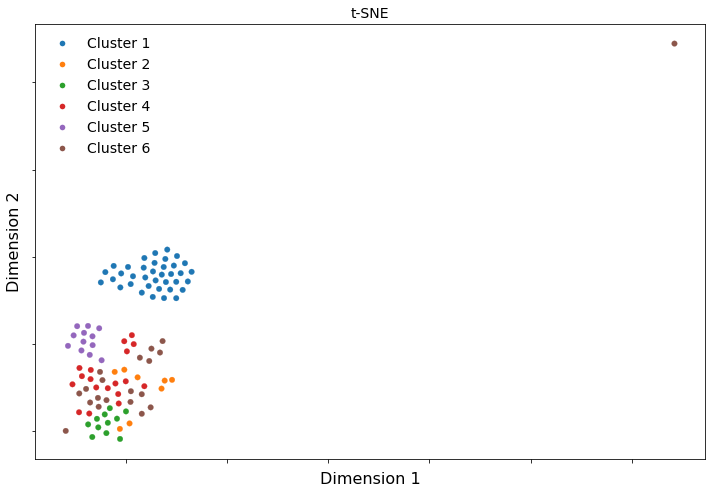

In [88]:
with plt.style.context(['seaborn-paper', PLOT_STYLE, {'legend.fontsize':14,
                                                      'legend.frameon':False}]):

    fig = plt.figure(figsize=(12,8))
    ax = fig.add_subplot(111)
    ax = plot_component_embedding(X, clusters=clusters, ax=ax);
    plt.title('t-SNE', fontsize=14)
    #fig.savefig('./figures/figure_3_clustering.eps', bbox_inches='tight')

# CLUSTER ANALYSIS

## Cluster 1

In [70]:
cluster_1 = clusters[clusters == 1] # all components in cluster 1

In [71]:
cluster_1

246    1
236    1
209    1
237    1
205    1
244    1
247    1
30     1
76     1
38     1
96     1
93     1
50     1
242    1
235    1
134    1
243    1
231    1
245    1
230    1
229    1
49     1
228    1
145    1
144    1
35     1
16     1
121    1
24     1
119    1
67     1
149    1
52     1
95     1
113    1
103    1
41     1
dtype: int64

In [72]:
cluster_1.value_counts()

1    37
dtype: int64

In [73]:
comp_246 = components[246]

In [74]:
components[246]

<EventGraph with 2 nodes, 19 events, and 18 edges (status: built)>

In [75]:
components[103]

<EventGraph with 2 nodes, 5 events, and 4 edges (status: built)>

In [76]:
comp_41 = components[41]
comp_41

<EventGraph with 2 nodes, 5 events, and 4 edges (status: built)>

In [77]:
for ix, component in enumerate(cluster_1.index):
    print('')
    print(f'component {component}')
    component = filtered.events[filtered.events_meta.component == component]
    print(component)


component 246
                        source                    target  time     type
1531  PtNum_rvketc0eaca30rvket  PtNum_rvketbaaf01b9rvket   620  renal_5
1532  PtNum_rvketc0eaca30rvket  PtNum_rvketbaaf01b9rvket   621  renal_5
1533  PtNum_rvketc0eaca30rvket  PtNum_rvketbaaf01b9rvket   622  renal_5
1534  PtNum_rvketc0eaca30rvket  PtNum_rvketbaaf01b9rvket   623  renal_5
1535  PtNum_rvketc0eaca30rvket  PtNum_rvketbaaf01b9rvket   624  renal_5
1536  PtNum_rvketc0eaca30rvket  PtNum_rvketbaaf01b9rvket   625  renal_5
1537  PtNum_rvketc0eaca30rvket  PtNum_rvketbaaf01b9rvket   626  renal_5
1538  PtNum_rvketc0eaca30rvket  PtNum_rvketbaaf01b9rvket   627  renal_5
1539  PtNum_rvketc0eaca30rvket  PtNum_rvketbaaf01b9rvket   628  renal_5
1540  PtNum_rvketc0eaca30rvket  PtNum_rvketbaaf01b9rvket   629  renal_5
1541  PtNum_rvketc0eaca30rvket  PtNum_rvketbaaf01b9rvket   630  renal_5
1542  PtNum_rvketc0eaca30rvket  PtNum_rvketbaaf01b9rvket   631  renal_5
1543  PtNum_rvketc0eaca30rvket  PtNum_rvketbaaf01

In [89]:
df.loc[[1416]] 

,source,target,time,type
1416,PtNum_rvket7a8132a6rvket,PtNum_rvket39051a44rvket,614,renal_4


In [80]:
for i in range(1412, 1422):
    print(df.loc[[i]])

                        source                    target  time     type
1412  PtNum_rvket7a8132a6rvket  PtNum_rvket39051a44rvket   610  renal_4
                        source                    target  time     type
1413  PtNum_rvket7a8132a6rvket  PtNum_rvket39051a44rvket   611  renal_4
                        source                    target  time     type
1414  PtNum_rvket7a8132a6rvket  PtNum_rvket39051a44rvket   612  renal_4
                        source                    target  time     type
1415  PtNum_rvket7a8132a6rvket  PtNum_rvket39051a44rvket   613  renal_4
                        source                    target  time     type
1416  PtNum_rvket7a8132a6rvket  PtNum_rvket39051a44rvket   614  renal_4
                        source                    target  time     type
1417  PtNum_rvket7a8132a6rvket  PtNum_rvket39051a44rvket   615  renal_4
                        source                    target  time     type
1418  PtNum_rvket7a8132a6rvket  PtNum_rvket39051a44rvket   616  

In [81]:
print(df.loc[[1497,1506]])

                        source                    target  time        type
1497  PtNum_rvket7a8132a6rvket  PtNum_rvket39051a44rvket   620     renal_4
1506  PtNum_rvketfd449b7drvket  PtNum_rvket55e72642rvket   620  medicine_5


In [82]:
comp_41_nx = comp_41.create_networkx_event_graph()

In [83]:
save_graph_with_colour(comp_41_nx, 'comp_41.png')

[]


In [84]:
comp_41_lst = []
for i in range(238, 239):
    s = df.loc[i].name
    print(s)

238


In [85]:
d = []
for i in range(238, 243):
    item = df.loc[i]
    d.append(
        {
            'Event': item.name,
            'Source': item.source,
            'Target':  item.target,
            'Time': item.time,
            'Type': item.type
        }
    )

comp_41_df = pd.DataFrame(d)

In [86]:
print(comp_41_df.to_latex())

\begin{tabular}{lrllrl}
\toprule
{} &  Event &                    Source &                    Target &  Time &     Type \\
\midrule
0 &    238 &  PtNum\_rvketfa70b283rvket &  PtNum\_rvketcf640db6rvket &    67 &  renal\_5 \\
1 &    239 &  PtNum\_rvketfa70b283rvket &  PtNum\_rvketcf640db6rvket &    68 &  renal\_5 \\
2 &    240 &  PtNum\_rvketfa70b283rvket &  PtNum\_rvketcf640db6rvket &    69 &  renal\_5 \\
3 &    241 &  PtNum\_rvketfa70b283rvket &  PtNum\_rvketcf640db6rvket &    70 &  renal\_5 \\
4 &    242 &  PtNum\_rvketfa70b283rvket &  PtNum\_rvketcf640db6rvket &    71 &  renal\_5 \\
\bottomrule
\end{tabular}



<img src = 'comp_41.png'>

In [87]:
comp_246_nx = comp_246.create_networkx_event_graph()

In [88]:
save_graph(comp_246_nx, 'comp_246.png')

<img src = 'comp_246.png'>

## Cluster 2

In [89]:
cluster_2 = clusters[clusters == 2] # all components in cluster 2

In [90]:
cluster_2

197    2
3      2
123    2
4      2
185    2
196    2
120    2
84     2
dtype: int64

In [91]:
cluster_2.value_counts()

2    8
dtype: int64

In [92]:
comp_197 = components[197]
comp_197

<EventGraph with 7 nodes, 25 events, and 24 edges (status: built)>

In [115]:
comp_3 = components[3]
comp_3

<EventGraph with 5 nodes, 21 events, and 20 edges (status: built)>

In [116]:
comp_123 = components[123]
comp_123

<EventGraph with 3 nodes, 20 events, and 19 edges (status: built)>

In [117]:
comp_84 = components[84]
comp_84

<EventGraph with 3 nodes, 10 events, and 9 edges (status: built)>

In [118]:
for ix, component in enumerate(cluster_2.index):
    print('')
    print(f'component {component}')
    component = filtered.events[filtered.events_meta.component == component]
    print(component)


component 197
                        source                    target  time       type
1129  PtNum_rvketc8e93273rvket  PtNum_rvket03ec9a12rvket   496  surgery_1
1130  PtNum_rvketc8e93273rvket  PtNum_rvket03ec9a12rvket   497  surgery_1
1131  PtNum_rvketc8e93273rvket  PtNum_rvket03ec9a12rvket   498  surgery_1
1195  PtNum_rvketce767afcrvket  PtNum_rvket490b9fe7rvket   482  surgery_1
1196  PtNum_rvketce767afcrvket  PtNum_rvket490b9fe7rvket   483  surgery_1
1197  PtNum_rvketce767afcrvket  PtNum_rvket490b9fe7rvket   484  surgery_1
1198  PtNum_rvketce767afcrvket  PtNum_rvket490b9fe7rvket   485  surgery_1
1199  PtNum_rvketde1f4e58rvket  PtNum_rvket490b9fe7rvket   486  surgery_1
1200  PtNum_rvketde1f4e58rvket  PtNum_rvket490b9fe7rvket   487  surgery_1
1201  PtNum_rvketde1f4e58rvket  PtNum_rvket490b9fe7rvket   488  surgery_1
1202  PtNum_rvketde1f4e58rvket  PtNum_rvket490b9fe7rvket   489  surgery_1
1203  PtNum_rvketce767afcrvket  PtNum_rvket5536d828rvket   494  surgery_1
1204  PtNum_rvketce767a

## 197 

In [119]:
comp_197_nx = comp_197.create_networkx_event_graph()

In [120]:
save_graph_with_colour(comp_197_nx, 'comp_197_nx.png')

[]


<img src = 'comp_197_nx.png'>

In [121]:
for i in range(1129, 1132):
    print(df.loc[[i]])

                        source                    target  time       type
1129  PtNum_rvketc8e93273rvket  PtNum_rvket03ec9a12rvket   496  surgery_1
                        source                    target  time       type
1130  PtNum_rvketc8e93273rvket  PtNum_rvket03ec9a12rvket   497  surgery_1
                        source                    target  time       type
1131  PtNum_rvketc8e93273rvket  PtNum_rvket03ec9a12rvket   498  surgery_1


In [122]:
for i in range(1195, 1203):
    print(df.loc[[i]])

                        source                    target  time       type
1195  PtNum_rvketce767afcrvket  PtNum_rvket490b9fe7rvket   482  surgery_1
                        source                    target  time       type
1196  PtNum_rvketce767afcrvket  PtNum_rvket490b9fe7rvket   483  surgery_1
                        source                    target  time       type
1197  PtNum_rvketce767afcrvket  PtNum_rvket490b9fe7rvket   484  surgery_1
                        source                    target  time       type
1198  PtNum_rvketce767afcrvket  PtNum_rvket490b9fe7rvket   485  surgery_1
                        source                    target  time       type
1199  PtNum_rvketde1f4e58rvket  PtNum_rvket490b9fe7rvket   486  surgery_1
                        source                    target  time       type
1200  PtNum_rvketde1f4e58rvket  PtNum_rvket490b9fe7rvket   487  surgery_1
                        source                    target  time       type
1201  PtNum_rvketde1f4e58rvket  PtNum_

In [123]:
for i in range(1203, 1208):
    print(df.loc[[i]])

                        source                    target  time       type
1203  PtNum_rvketce767afcrvket  PtNum_rvket5536d828rvket   494  surgery_1
                        source                    target  time       type
1204  PtNum_rvketce767afcrvket  PtNum_rvket5536d828rvket   495  surgery_1
                        source                    target  time       type
1205  PtNum_rvketce767afcrvket  PtNum_rvket5536d828rvket   496  surgery_1
                        source                    target  time       type
1206  PtNum_rvketce767afcrvket  PtNum_rvket5536d828rvket   497  surgery_1
                        source                    target  time       type
1207  PtNum_rvketce767afcrvket  PtNum_rvket5536d828rvket   498  surgery_1


In [124]:
for i in range(1234, 1236):
    print(df.loc[[i]])

                        source                    target  time       type
1234  PtNum_rvket490b9fe7rvket  PtNum_rvket03ec9a12rvket   499  surgery_1
                        source                    target  time       type
1235  PtNum_rvket490b9fe7rvket  PtNum_rvket03ec9a12rvket   500  surgery_1


## 123

In [125]:
comp_123_nx = comp_123.create_networkx_event_graph()

In [126]:
save_graph_with_colour(comp_123_nx, 'comp_123_nx.png')

[]


<img src = 'comp_123_nx.png'>

In [127]:
for i in range(840, 848):
    print(df.loc[[i]])

                       source                    target  time        type
840  PtNum_rvketb949edbdrvket  PtNum_rvketa2c72debrvket   305  medicine_3
                       source                    target  time        type
841  PtNum_rvketb949edbdrvket  PtNum_rvketa2c72debrvket   306  medicine_3
                       source                    target  time        type
842  PtNum_rvketb949edbdrvket  PtNum_rvketa2c72debrvket   307  medicine_3
                       source                    target  time       type
843  PtNum_rvketb949edbdrvket  PtNum_rvketa2c72debrvket   310  elderly_3
                       source                    target  time       type
844  PtNum_rvketb949edbdrvket  PtNum_rvketa2c72debrvket   311  elderly_3
                       source                    target  time       type
845  PtNum_rvketb949edbdrvket  PtNum_rvketa2c72debrvket   312  elderly_3
                       source                    target  time       type
846  PtNum_rvketb949edbdrvket  PtNum_rvketa2c

In [128]:
for i in range(866, 872):
    print(df.loc[[i]])

                       source                    target  time       type
866  PtNum_rvketa2c72debrvket  PtNum_rvket5121184frvket   315  elderly_3
                       source                    target  time       type
867  PtNum_rvketa2c72debrvket  PtNum_rvket5121184frvket   316  elderly_3
                       source                    target  time       type
868  PtNum_rvketa2c72debrvket  PtNum_rvket5121184frvket   317  elderly_3
                       source                    target  time       type
869  PtNum_rvketa2c72debrvket  PtNum_rvket5121184frvket   318  elderly_3
                       source                    target  time       type
870  PtNum_rvketa2c72debrvket  PtNum_rvket5121184frvket   319  elderly_3
                       source                    target  time       type
871  PtNum_rvketa2c72debrvket  PtNum_rvket5121184frvket   320  elderly_1


In [129]:
for i in range(872, 878):
    print(df.loc[[i]])

                       source                    target  time       type
872  PtNum_rvketb949edbdrvket  PtNum_rvket5121184frvket   315  elderly_3
                       source                    target  time       type
873  PtNum_rvketb949edbdrvket  PtNum_rvket5121184frvket   316  elderly_3
                       source                    target  time       type
874  PtNum_rvketb949edbdrvket  PtNum_rvket5121184frvket   317  elderly_3
                       source                    target  time       type
875  PtNum_rvketb949edbdrvket  PtNum_rvket5121184frvket   318  elderly_3
                       source                    target  time       type
876  PtNum_rvketb949edbdrvket  PtNum_rvket5121184frvket   319  elderly_3
                       source                    target  time       type
877  PtNum_rvketb949edbdrvket  PtNum_rvket5121184frvket   320  elderly_1


In [130]:
df.loc[[878]]

,source,target,time,type
878,PtNum_rvketc94166b0rvket,PtNum_rvket55cd3274rvket,315,Ward_na


## Cluster 3

In [131]:
cluster_3 = clusters[clusters == 3] # all components in cluster 3

In [132]:
cluster_3

87     3
62     3
18     3
241    3
58     3
45     3
216    3
114    3
7      3
248    3
129    3
dtype: int64

In [133]:
cluster_3.value_counts()

3    11
dtype: int64

In [134]:
comp_87 = components[87]
comp_87

<EventGraph with 13 nodes, 34 events, and 33 edges (status: built)>

In [135]:
comp_62 = components[62]
comp_62

<EventGraph with 9 nodes, 31 events, and 30 edges (status: built)>

In [136]:
comp_18 = components[18]
comp_18

<EventGraph with 5 nodes, 15 events, and 15 edges (status: built)>

In [137]:
comp_248 = components[248]
comp_248

<EventGraph with 4 nodes, 7 events, and 6 edges (status: built)>

In [138]:
comp_129 = components[129]
comp_129

<EventGraph with 5 nodes, 5 events, and 4 edges (status: built)>

In [139]:
for ix, component in enumerate(cluster_3.index):
    print('')
    print(f'component {component}')
    component = filtered.events[filtered.events_meta.component == component]
    print(component)


component 87
                       source                    target  time           type
563  PtNum_rvket6b02399frvket  PtNum_rvket4faa1d73rvket   211        renal_5
597  PtNum_rvketb391c088rvket  PtNum_rvket85701936rvket   205        renal_1
616  PtNum_rvketbd699529rvket  PtNum_rvketb391c088rvket   208        renal_2
617  PtNum_rvketc1168143rvket  PtNum_rvketbd699529rvket   211        renal_2
618  PtNum_rvketfa70b283rvket  PtNum_rvketbd699529rvket   212        renal_2
655  PtNum_rvket8c5c189arvket  PtNum_rvket4faa1d73rvket   229        Ward_na
656  PtNum_rvketbd699529rvket  PtNum_rvket4faa1d73rvket   231        renal_3
657  PtNum_rvketbd699529rvket  PtNum_rvket4faa1d73rvket   232        renal_3
658  PtNum_rvketbd699529rvket  PtNum_rvket4faa1d73rvket   245        renal_3
659  PtNum_rvketbd699529rvket  PtNum_rvket4faa1d73rvket   246        renal_3
661  PtNum_rvket8c5c189arvket  PtNum_rvket5536d828rvket   240        Ward_na
662  PtNum_rvket8c5c189arvket  PtNum_rvket5536d828rvket   241 

In [140]:
home_dir_2 = "C:\\Users\\matth\\Documents\\IMPERIAL\\PROJECT\\comp_62_data.xlsx"

comp_62_df = pd.read_excel(home_dir_2)
comp_62_df

,362,PtNum_rvket61f2344arvket,PtNum_rvket253f82dbrvket,112,oncology_2
0,363,PtNum_rvket61f2344arvket,PtNum_rvket253f82dbrvket,113,oncology_2
1,364,PtNum_rvket61f2344arvket,PtNum_rvket253f82dbrvket,114,oncology_2
2,365,PtNum_rvket61f2344arvket,PtNum_rvket253f82dbrvket,115,oncology_2
3,392,PtNum_rvket9bd252d5rvket,PtNum_rvket61f2344arvket,121,respiratory_2
4,393,PtNum_rvket9bd252d5rvket,PtNum_rvket61f2344arvket,122,respiratory_2
5,419,PtNum_rvket41233dc3rvket,PtNum_rvket2a2cab77rvket,162,surgery_12
6,420,PtNum_rvket41233dc3rvket,PtNum_rvket2a2cab77rvket,163,surgery_12
7,421,PtNum_rvket41233dc3rvket,PtNum_rvket2a2cab77rvket,164,surgery_12
8,426,PtNum_rvket9bd252d5rvket,PtNum_rvket3c61c1aarvket,150,respiratory_2
9,427,PtNum_rvket9bd252d5rvket,PtNum_rvket3c61c1aarvket,151,respiratory_2


In [141]:
comp_62_df.columns =['Event', 'Source', 'Target', 'Time','Ward']

In [142]:
comp_62_df

,Event,Source,Target,Time,Ward
0,363,PtNum_rvket61f2344arvket,PtNum_rvket253f82dbrvket,113,oncology_2
1,364,PtNum_rvket61f2344arvket,PtNum_rvket253f82dbrvket,114,oncology_2
2,365,PtNum_rvket61f2344arvket,PtNum_rvket253f82dbrvket,115,oncology_2
3,392,PtNum_rvket9bd252d5rvket,PtNum_rvket61f2344arvket,121,respiratory_2
4,393,PtNum_rvket9bd252d5rvket,PtNum_rvket61f2344arvket,122,respiratory_2
5,419,PtNum_rvket41233dc3rvket,PtNum_rvket2a2cab77rvket,162,surgery_12
6,420,PtNum_rvket41233dc3rvket,PtNum_rvket2a2cab77rvket,163,surgery_12
7,421,PtNum_rvket41233dc3rvket,PtNum_rvket2a2cab77rvket,164,surgery_12
8,426,PtNum_rvket9bd252d5rvket,PtNum_rvket3c61c1aarvket,150,respiratory_2
9,427,PtNum_rvket9bd252d5rvket,PtNum_rvket3c61c1aarvket,151,respiratory_2


In [143]:
comp_248_nx = comp_248.create_networkx_event_graph()

In [144]:
save_graph_with_colour(comp_248_nx, 'comp_248_colour.png')

[]


<img src = 'comp_248_colour.png'>

In [145]:
comp_62_nx = comp_62.create_networkx_event_graph()

In [146]:
save_graph_with_colour(comp_62_nx, 'comp_62_colour.png')

[]


<img src = 'comp_62_colour.png'>

In [148]:
for i in range(362, 366):
    print(df.loc[[i]])

                       source                    target  time        type
362  PtNum_rvket61f2344arvket  PtNum_rvket253f82dbrvket   112  oncology_2
                       source                    target  time        type
363  PtNum_rvket61f2344arvket  PtNum_rvket253f82dbrvket   113  oncology_2
                       source                    target  time        type
364  PtNum_rvket61f2344arvket  PtNum_rvket253f82dbrvket   114  oncology_2
                       source                    target  time        type
365  PtNum_rvket61f2344arvket  PtNum_rvket253f82dbrvket   115  oncology_2


In [149]:
for i in range(392, 394):
    print(df.loc[[i]])

                       source                    target  time           type
392  PtNum_rvket9bd252d5rvket  PtNum_rvket61f2344arvket   121  respiratory_2
                       source                    target  time           type
393  PtNum_rvket9bd252d5rvket  PtNum_rvket61f2344arvket   122  respiratory_2


In [150]:
for i in range(439, 447):
    print(df.loc[[i]])

                       source                    target  time          type
439  PtNum_rvket7d4e3793rvket  PtNum_rvket61f2344arvket   134  cardiology_4
                       source                    target  time          type
440  PtNum_rvket7d4e3793rvket  PtNum_rvket61f2344arvket   135  cardiology_4
                       source                    target  time          type
441  PtNum_rvket9c12e357rvket  PtNum_rvket61f2344arvket   137  cardiology_4
                       source                    target  time          type
442  PtNum_rvket9c12e357rvket  PtNum_rvket61f2344arvket   138  cardiology_4
                       source                    target  time          type
443  PtNum_rvket9c12e357rvket  PtNum_rvket61f2344arvket   139  cardiology_4
                       source                    target  time          type
444  PtNum_rvket9c12e357rvket  PtNum_rvket61f2344arvket   140  cardiology_4
                       source                    target  time          type
445  PtNum_r

In [151]:
for i in range(426, 428):
    print(df.loc[[i]])

                       source                    target  time           type
426  PtNum_rvket9bd252d5rvket  PtNum_rvket3c61c1aarvket   150  respiratory_2
                       source                    target  time           type
427  PtNum_rvket9bd252d5rvket  PtNum_rvket3c61c1aarvket   151  respiratory_2


In [152]:
print(df.loc[[422]])

                       source                    target  time           type
422  PtNum_rvket8925f9c2rvket  PtNum_rvket3c61c1aarvket   152  respiratory_2


In [153]:
for i in range(419, 422):
    print(df.loc[[i]])

                       source                    target  time        type
419  PtNum_rvket41233dc3rvket  PtNum_rvket2a2cab77rvket   162  surgery_12
                       source                    target  time        type
420  PtNum_rvket41233dc3rvket  PtNum_rvket2a2cab77rvket   163  surgery_12
                       source                    target  time        type
421  PtNum_rvket41233dc3rvket  PtNum_rvket2a2cab77rvket   164  surgery_12


In [154]:
for i in range(488, 493):
    print(df.loc[[i]])

                       source                    target  time        type
488  PtNum_rvket41233dc3rvket  PtNum_rvket2a2cab77rvket   165  surgery_12
                       source                    target  time        type
489  PtNum_rvket41233dc3rvket  PtNum_rvket2a2cab77rvket   166  surgery_12
                       source                    target  time        type
490  PtNum_rvket41233dc3rvket  PtNum_rvket2a2cab77rvket   167  surgery_12
                       source                    target  time        type
491  PtNum_rvket41233dc3rvket  PtNum_rvket2a2cab77rvket   168  surgery_12
                       source                    target  time        type
492  PtNum_rvket41233dc3rvket  PtNum_rvket2a2cab77rvket   169  surgery_12


In [155]:
d = []
for i in range(493,494):
    item = df.loc[i]
    d.append(
        {
            'Event': item.name,
            'Source': item.source,
            'Target':  item.target,
            'Time': item.time,
            'Type': item.type
        }
    )

comp_62_df_10 = pd.DataFrame(d)
comp_62_df_10

,Event,Source,Target,Time,Type
0,493,PtNum_rvket41233dc3rvket,PtNum_rvket2a2cab77rvket,170,surgery_12


In [156]:
print(comp_62_df_10.to_latex())

\begin{tabular}{lrllrl}
\toprule
{} &  Event &                    Source &                    Target &  Time &        Type \\
\midrule
0 &    493 &  PtNum\_rvket41233dc3rvket &  PtNum\_rvket2a2cab77rvket &   170 &  surgery\_12 \\
\bottomrule
\end{tabular}



In [ ]:
comp_62_df = pd.concat(frames)

In [ ]:
comp_62_df

In [158]:
print(comp_62_df.to_latex())

\begin{tabular}{lrllrl}
\toprule
{} &  Event &                    Source &                    Target &  Time &           Ward \\
\midrule
0  &    363 &  PtNum\_rvket61f2344arvket &  PtNum\_rvket253f82dbrvket &   113 &     oncology\_2 \\
1  &    364 &  PtNum\_rvket61f2344arvket &  PtNum\_rvket253f82dbrvket &   114 &     oncology\_2 \\
2  &    365 &  PtNum\_rvket61f2344arvket &  PtNum\_rvket253f82dbrvket &   115 &     oncology\_2 \\
3  &    392 &  PtNum\_rvket9bd252d5rvket &  PtNum\_rvket61f2344arvket &   121 &  respiratory\_2 \\
4  &    393 &  PtNum\_rvket9bd252d5rvket &  PtNum\_rvket61f2344arvket &   122 &  respiratory\_2 \\
5  &    419 &  PtNum\_rvket41233dc3rvket &  PtNum\_rvket2a2cab77rvket &   162 &     surgery\_12 \\
6  &    420 &  PtNum\_rvket41233dc3rvket &  PtNum\_rvket2a2cab77rvket &   163 &     surgery\_12 \\
7  &    421 &  PtNum\_rvket41233dc3rvket &  PtNum\_rvket2a2cab77rvket &   164 &     surgery\_12 \\
8  &    426 &  PtNum\_rvket9bd252d5rvket &  PtNum\_rvket3c61c1aarvket 

In [159]:
comp_129_nx = comp_129.create_networkx_event_graph()

In [160]:
save_graph_with_colour(comp_129_nx, 'comp_129.png')

[]


<img src = 'comp_129.png'>

In [161]:
print(df.loc[[888]])

                       source                    target  time        type
888  PtNum_rvketbd699529rvket  PtNum_rvket5bf8fc37rvket   318  medicine_9


In [162]:
for i in range(921, 923):
    print(df.loc[[i]])

                       source                    target  time        type
921  PtNum_rvket5bf8fc37rvket  PtNum_rvket1baa5c25rvket   348  medicine_9
                       source                    target  time        type
922  PtNum_rvket5bf8fc37rvket  PtNum_rvket1baa5c25rvket   349  medicine_9


In [163]:
print(df.loc[[923]])

                       source                    target  time        type
923  PtNum_rvkete4174e4brvket  PtNum_rvket1fdae91ervket   348  medicine_9


In [164]:
print(df.loc[[958]])

                       source                    target  time        type
958  PtNum_rvkete4174e4brvket  PtNum_rvket5bf8fc37rvket   350  medicine_1


## Cluster 4

In [166]:
cluster_4 = clusters[clusters == 4] # all components in cluster 4

In [167]:
cluster_4

1      4
152    4
220    4
36     4
223    4
68     4
195    4
227    4
109    4
94     4
188    4
210    4
151    4
226    4
60     4
106    4
215    4
77     4
dtype: int64

In [168]:
cluster_4.value_counts()

4    18
dtype: int64

In [169]:
comp_1 = components[1]
comp_1

<EventGraph with 8 nodes, 34 events, and 33 edges (status: built)>

In [170]:
comp_152 = components[152]
comp_152

<EventGraph with 7 nodes, 31 events, and 30 edges (status: built)>

In [171]:
comp_220 = components[220]
comp_220

<EventGraph with 7 nodes, 28 events, and 27 edges (status: built)>

In [172]:
comp_77 = components[77]
comp_77

<EventGraph with 3 nodes, 6 events, and 5 edges (status: built)>

In [173]:
for ix, component in enumerate(cluster_4.index):
    print('')
    print(f'component {component}')
    component = filtered.events[filtered.events_meta.component == component]
    print(component)


component 1
                       source                    target  time     type
1    PtNum_rvket2f0c7655rvket  PtNum_rvket1e1e94farvket    11  renal_4
22   PtNum_rvket2f0c7655rvket  PtNum_rvket1e1e94farvket    12  renal_4
23   PtNum_rvket2f0c7655rvket  PtNum_rvket1e1e94farvket    13  renal_4
24   PtNum_rvket2f0c7655rvket  PtNum_rvket1e1e94farvket    14  renal_4
26   PtNum_rvket572ddf2crvket  PtNum_rvket2f0c7655rvket    28  renal_4
27   PtNum_rvket572ddf2crvket  PtNum_rvket2f0c7655rvket    29  renal_4
28   PtNum_rvket572ddf2crvket  PtNum_rvket2f0c7655rvket    30  renal_4
29   PtNum_rvket572ddf2crvket  PtNum_rvket2f0c7655rvket    31  renal_4
30   PtNum_rvket572ddf2crvket  PtNum_rvket2f0c7655rvket    32  renal_4
31   PtNum_rvket572ddf2crvket  PtNum_rvket2f0c7655rvket    33  renal_4
32   PtNum_rvket572ddf2crvket  PtNum_rvket2f0c7655rvket    34  renal_4
33   PtNum_rvket572ddf2crvket  PtNum_rvket2f0c7655rvket    35  renal_4
34   PtNum_rvket572ddf2crvket  PtNum_rvket2f0c7655rvket    36  r

In [174]:
comp_152_nx = comp_152.create_networkx_event_graph()

In [175]:
save_graph_with_colour(comp_152_nx, 'comp_152.png')

[]


<img src = 'comp_152.png'>

In [176]:
for i in range(989, 994):
    print(df.loc[[i]])

                       source                    target  time     type
989  PtNum_rvket1b5f8cc4rvket  PtNum_rvket060ad40ervket   396  renal_2
                       source                    target  time     type
990  PtNum_rvket1b5f8cc4rvket  PtNum_rvket060ad40ervket   397  renal_2
                       source                    target  time     type
991  PtNum_rvket1b5f8cc4rvket  PtNum_rvket060ad40ervket   398  renal_2
                       source                    target  time     type
992  PtNum_rvket1b5f8cc4rvket  PtNum_rvket060ad40ervket   399  renal_2
                       source                    target  time     type
993  PtNum_rvket1b5f8cc4rvket  PtNum_rvket060ad40ervket   400  renal_2


In [177]:
for i in range(1047, 1054):
    print(df.loc[[i]])

                        source                    target  time  \
1047  PtNum_rvketcad398a4rvket  PtNum_rvket1863f819rvket   391   

                       type  
1047  infectious diseases_1  
                        source                    target  time     type
1048  PtNum_rvketcad398a4rvket  PtNum_rvket1b5f8cc4rvket   401  renal_4
                        source                    target  time     type
1049  PtNum_rvketcad398a4rvket  PtNum_rvket1b5f8cc4rvket   402  renal_4
                        source                    target  time     type
1050  PtNum_rvketcad398a4rvket  PtNum_rvket1b5f8cc4rvket   403  renal_4
                        source                    target  time     type
1051  PtNum_rvketcad398a4rvket  PtNum_rvket1b5f8cc4rvket   404  renal_4
                        source                    target  time     type
1052  PtNum_rvketcad398a4rvket  PtNum_rvket1b5f8cc4rvket   405  renal_4
                        source                    target  time     type
1053  PtNum_rvk

In [178]:
for i in range(1387, 1393):
    print(df.loc[[i]])

                        source                    target  time     type
1387  PtNum_rvket1a7e46c4rvket  PtNum_rvket13d1f2d5rvket   592  renal_4
                        source                    target  time     type
1388  PtNum_rvket1fd45dd9rvket  PtNum_rvket1513964arvket   592  renal_5
                        source                    target  time     type
1389  PtNum_rvket1fd45dd9rvket  PtNum_rvket1513964arvket   593  renal_5
                        source                    target  time     type
1390  PtNum_rvketcf1cf00brvket  PtNum_rvket1fd45dd9rvket   601  renal_5
                        source                    target  time     type
1391  PtNum_rvketcf1cf00brvket  PtNum_rvket1fd45dd9rvket   602  renal_5
                        source                    target  time     type
1392  PtNum_rvketcf1cf00brvket  PtNum_rvket1fd45dd9rvket   603  renal_5


## cluster 5

In [180]:
cluster_5 = clusters[clusters == 5] # all components in cluster 5

In [181]:
cluster_5

99     5
101    5
6      5
32     5
31     5
118    5
46     5
51     5
86     5
80     5
34     5
33     5
dtype: int64

In [182]:
cluster_5.value_counts()

5    12
dtype: int64

In [183]:
comp_99 = components[99]
comp_99

<EventGraph with 4 nodes, 34 events, and 33 edges (status: built)>

In [184]:
comp_101 = components[101]
comp_101

<EventGraph with 3 nodes, 19 events, and 18 edges (status: built)>

In [185]:
comp_33 = components[33]
comp_33

<EventGraph with 3 nodes, 6 events, and 5 edges (status: built)>

In [186]:
comp_101_nx = comp_101.create_networkx_event_graph()

In [187]:
save_graph_with_colour(comp_101_nx, 'comp_101.png')

[]


<img src = 'comp_101.png'>

In [188]:
print(df.loc[[660]])

                       source                    target  time        type
660  PtNum_rvketaa68e117rvket  PtNum_rvket5121184frvket   253  medicine_3


In [189]:
for i in range(781, 799):
    print(df.loc[[i]])

                       source                    target  time       type
781  PtNum_rvket5ddb953crvket  PtNum_rvket5121184frvket   297  elderly_3
                       source                    target  time       type
782  PtNum_rvket5ddb953crvket  PtNum_rvket5121184frvket   298  elderly_3
                       source                    target  time       type
783  PtNum_rvket5ddb953crvket  PtNum_rvket5121184frvket   299  elderly_3
                       source                    target  time       type
784  PtNum_rvket5ddb953crvket  PtNum_rvket5121184frvket   300  elderly_3
                       source                    target  time       type
785  PtNum_rvket5ddb953crvket  PtNum_rvket5121184frvket   301  elderly_3
                       source                    target  time       type
786  PtNum_rvket5ddb953crvket  PtNum_rvket5121184frvket   302  elderly_3
                       source                    target  time       type
787  PtNum_rvket5ddb953crvket  PtNum_rvket5121184fr

In [190]:
d = []
for i in range(294, 295):
    item = df.loc[i]
    d.append(
        {
            'Event': item.name,
            'Source': item.source,
            'Target':  item.target,
            'Time': item.time,
            'Type': item.type
        }
    )

comp_33_df_2 = pd.DataFrame(d)
comp_33_df_2

,Event,Source,Target,Time,Type
0,294,PtNum_rvket89ef548arvket,PtNum_rvket51fd7a15rvket,81,surgery_1


In [77]:
comp_33_nx = comp_33.create_networkx_event_graph()

In [78]:
save_graph_with_colour(comp_33_nx, 'comp_33.png')

[]


<img src = 'comp_33.png'>

In [79]:
for i in range(182, 187):
    print(df.loc[[i]])

                       source                    target  time       type
182  PtNum_rvket774d8ba5rvket  PtNum_rvket51fd7a15rvket    63  surgery_1
                       source                    target  time       type
183  PtNum_rvket774d8ba5rvket  PtNum_rvket51fd7a15rvket    64  surgery_1
                       source                    target  time       type
184  PtNum_rvket774d8ba5rvket  PtNum_rvket51fd7a15rvket    65  surgery_1
                       source                    target  time       type
185  PtNum_rvket774d8ba5rvket  PtNum_rvket51fd7a15rvket    66  surgery_1
                       source                    target  time       type
186  PtNum_rvket774d8ba5rvket  PtNum_rvket51fd7a15rvket    67  surgery_1


In [80]:
print(df.loc[[294]])

                       source                    target  time       type
294  PtNum_rvket89ef548arvket  PtNum_rvket51fd7a15rvket    81  surgery_1


In [81]:
for ix, component in enumerate(cluster_5.index):
    print('')
    print(f'component {component}')
    component = filtered.events[filtered.events_meta.component == component]
    print(component)


component 99
                       source                    target  time       type
637  PtNum_rvket8c5f03c3rvket  PtNum_rvket1b657bcarvket   246  elderly_5
638  PtNum_rvket8c5f03c3rvket  PtNum_rvket1b657bcarvket   247  elderly_5
639  PtNum_rvket8c5f03c3rvket  PtNum_rvket1b657bcarvket   248  elderly_5
640  PtNum_rvket8c5f03c3rvket  PtNum_rvket1b657bcarvket   249  elderly_5
641  PtNum_rvket8c5f03c3rvket  PtNum_rvket1b657bcarvket   250  elderly_5
642  PtNum_rvket8c5f03c3rvket  PtNum_rvket1b657bcarvket   251  elderly_5
643  PtNum_rvket8c5f03c3rvket  PtNum_rvket1b657bcarvket   252  elderly_5
684  PtNum_rvketa1a56cbfrvket  PtNum_rvket1b657bcarvket   271  elderly_5
685  PtNum_rvketa1a56cbfrvket  PtNum_rvket1b657bcarvket   272  elderly_5
686  PtNum_rvketa1a56cbfrvket  PtNum_rvket1b657bcarvket   273  elderly_5
687  PtNum_rvketa1a56cbfrvket  PtNum_rvket1b657bcarvket   274  elderly_5
688  PtNum_rvketa1a56cbfrvket  PtNum_rvket1b657bcarvket   275  elderly_5
689  PtNum_rvketa1a56cbfrvket  PtNum_

## Cluster 6

In [90]:
cluster_6 = clusters[clusters == 6] # all components in cluster 6

In [144]:
cluster_6

17     6
225    6
238    6
142    6
70     6
232    6
15     6
187    6
104    6
9      6
85     6
92     6
83     6
251    6
61     6
64     6
126    6
127    6
13     6
73     6
dtype: int64

In [145]:
cluster_6.value_counts()

6    20
dtype: int64

In [146]:
comp_17 = components[17]
comp_17

<EventGraph with 5 nodes, 24 events, and 23 edges (status: built)>

In [147]:
comp_225 = components[225]
comp_225

<EventGraph with 5 nodes, 18 events, and 17 edges (status: built)>

In [148]:
comp_83 = components[83]
comp_83

<EventGraph with 3 nodes, 11 events, and 10 edges (status: built)>

In [149]:
comp_73 = components[73]
comp_73

<EventGraph with 4 nodes, 5 events, and 4 edges (status: built)>

In [150]:
comp_83_nx = comp_83.create_networkx_event_graph()

In [151]:
save_graph_with_colour(comp_83_nx, 'comp_83.png')

[]


<img src = 'comp_83.png'>

In [152]:
print(df.loc[[538]])

                       source                    target  time        type
538  PtNum_rvketb018cbe8rvket  PtNum_rvket1ab72c20rvket   197  medicine_3


In [153]:
for i in range(584, 587):
    print(df.loc[[i]])

                       source                    target  time       type
584  PtNum_rvketb018cbe8rvket  PtNum_rvket6d319f37rvket   215  elderly_1
                       source                    target  time       type
585  PtNum_rvketb018cbe8rvket  PtNum_rvket6d319f37rvket   216  elderly_1
                       source                    target  time       type
586  PtNum_rvketb018cbe8rvket  PtNum_rvket6d319f37rvket   217  elderly_1


In [154]:
for i in range(577, 584):
    print(df.loc[[i]])

                       source                    target  time       type
577  PtNum_rvketb018cbe8rvket  PtNum_rvket6d319f37rvket   208  elderly_1
                       source                    target  time       type
578  PtNum_rvketb018cbe8rvket  PtNum_rvket6d319f37rvket   209  elderly_1
                       source                    target  time       type
579  PtNum_rvketb018cbe8rvket  PtNum_rvket6d319f37rvket   210  elderly_1
                       source                    target  time       type
580  PtNum_rvketb018cbe8rvket  PtNum_rvket6d319f37rvket   211  elderly_1
                       source                    target  time       type
581  PtNum_rvketb018cbe8rvket  PtNum_rvket6d319f37rvket   212  elderly_1
                       source                    target  time       type
582  PtNum_rvketb018cbe8rvket  PtNum_rvket6d319f37rvket   213  elderly_1
                       source                    target  time       type
583  PtNum_rvketb018cbe8rvket  PtNum_rvket6d319f37r

In [155]:
comp_17_nx = comp_17.create_networkx_event_graph()

In [156]:
save_graph_with_colour(comp_17_nx, 'comp_17.png')

[]


<img src = 'comp_17.png'>

In [157]:
print(df.loc[[97]])

                      source                    target  time     type
97  PtNum_rvketfa70b283rvket  PtNum_rvketb391c088rvket    22  renal_1


In [158]:
for i in range(123, 127):
    print(df.loc[[i]])

                       source                    target  time     type
123  PtNum_rvketfa70b283rvket  PtNum_rvket1a4b3d57rvket    61  renal_5
                       source                    target  time     type
124  PtNum_rvketfa70b283rvket  PtNum_rvket1a4b3d57rvket    62  renal_5
                       source                    target  time     type
125  PtNum_rvketfa70b283rvket  PtNum_rvket1a4b3d57rvket    63  renal_5
                       source                    target  time     type
126  PtNum_rvketfa70b283rvket  PtNum_rvket1a4b3d57rvket    64  renal_5


In [159]:
for i in range(202, 208):
    print(df.loc[[i]])

                       source                    target  time     type
202  PtNum_rvketfa70b283rvket  PtNum_rvket572ddf2crvket    66  renal_5
                       source                    target  time     type
203  PtNum_rvketfa70b283rvket  PtNum_rvket572ddf2crvket    67  renal_5
                       source                    target  time     type
204  PtNum_rvketfa70b283rvket  PtNum_rvket572ddf2crvket    68  renal_5
                       source                    target  time     type
205  PtNum_rvketfa70b283rvket  PtNum_rvket572ddf2crvket    69  renal_5
                       source                    target  time     type
206  PtNum_rvketfa70b283rvket  PtNum_rvket572ddf2crvket    70  renal_5
                       source                    target  time     type
207  PtNum_rvketfa70b283rvket  PtNum_rvket572ddf2crvket    71  renal_5


In [160]:
for i in range(263, 276):
    print(df.loc[[i]])

                       source                    target  time     type
263  PtNum_rvket572ddf2crvket  PtNum_rvket14671d8ervket    81  renal_5
                       source                    target  time     type
264  PtNum_rvket572ddf2crvket  PtNum_rvket14671d8ervket    82  renal_5
                       source                    target  time     type
265  PtNum_rvket572ddf2crvket  PtNum_rvket14671d8ervket    83  renal_5
                       source                    target  time     type
266  PtNum_rvket572ddf2crvket  PtNum_rvket14671d8ervket    84  renal_5
                       source                    target  time     type
267  PtNum_rvket572ddf2crvket  PtNum_rvket14671d8ervket    85  renal_5
                       source                    target  time     type
268  PtNum_rvket572ddf2crvket  PtNum_rvket14671d8ervket    86  renal_5
                       source                    target  time     type
269  PtNum_rvket572ddf2crvket  PtNum_rvket14671d8ervket    87  renal_5
      

In [125]:
for ix, component in enumerate(cluster_6.index):
    print('')
    print(f'component {component}')
    component = filtered.events[filtered.events_meta.component == component]
    print(component)


component 17
                       source                    target  time     type
97   PtNum_rvketfa70b283rvket  PtNum_rvketb391c088rvket    22  renal_1
123  PtNum_rvketfa70b283rvket  PtNum_rvket1a4b3d57rvket    61  renal_5
124  PtNum_rvketfa70b283rvket  PtNum_rvket1a4b3d57rvket    62  renal_5
125  PtNum_rvketfa70b283rvket  PtNum_rvket1a4b3d57rvket    63  renal_5
126  PtNum_rvketfa70b283rvket  PtNum_rvket1a4b3d57rvket    64  renal_5
202  PtNum_rvketfa70b283rvket  PtNum_rvket572ddf2crvket    66  renal_5
203  PtNum_rvketfa70b283rvket  PtNum_rvket572ddf2crvket    67  renal_5
204  PtNum_rvketfa70b283rvket  PtNum_rvket572ddf2crvket    68  renal_5
205  PtNum_rvketfa70b283rvket  PtNum_rvket572ddf2crvket    69  renal_5
206  PtNum_rvketfa70b283rvket  PtNum_rvket572ddf2crvket    70  renal_5
207  PtNum_rvketfa70b283rvket  PtNum_rvket572ddf2crvket    71  renal_5
263  PtNum_rvket572ddf2crvket  PtNum_rvket14671d8ervket    81  renal_5
264  PtNum_rvket572ddf2crvket  PtNum_rvket14671d8ervket    82  

In [83]:
def printer(cluster):
    
    cluster_df = pd.DataFrame(cluster)
    outbreaks = cluster_df.index.values
    node_lst = []
    event_lst = []
    for out in outbreaks:
        node_lst.append(components[out].N)
        event_lst.append(components[out].M)
    return np.transpose(node_lst), np.transpose(event_lst)

In [91]:
cluster_1_node_lst, cluster_1_event_lst= printer(cluster_1)
print(cluster_1_node_lst)
print(cluster_1_event_lst)
print(np.mean(cluster_1_node_lst))

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
[19 19 17 17 17 17 15 14 12 12 11 10  9  9  9  8  8  8  8  8  8  8  8  7
  6  6  6  6  6  6  6  6  6  5  5  5  5]
2.0


In [92]:
cluster_2_node_lst, cluster_2_event_lst= printer(cluster_2)
print(cluster_2_node_lst)
print(cluster_2_event_lst)
print(np.mean(cluster_2_node_lst))

[7 5 3 5 4 5 3 3]
[25 21 20 16 15 13 12 10]
4.375


In [93]:
cluster_3_node_lst, cluster_3_event_lst= printer(cluster_3)
print(cluster_3_node_lst)
print(cluster_3_event_lst)
print(np.mean(cluster_3_node_lst))

[13  9  5  5  6  6  5  5  5  4  5]
[34 31 15 12 11 11 10  9  8  7  5]
6.181818181818182


In [94]:
cluster_4_node_lst, cluster_4_event_lst= printer(cluster_4)
print(cluster_4_node_lst)
print(cluster_4_event_lst)
print(np.mean(cluster_4_node_lst))

[8 7 7 5 3 7 4 3 4 4 4 3 4 3 4 4 3 3]
[34 31 28 28 23 17 14 13 13 12 12 11  9  9  8  7  7  6]
4.444444444444445


In [95]:
cluster_5_node_lst, cluster_5_event_lst= printer(cluster_5)
print(cluster_5_node_lst)
print(cluster_5_event_lst)
print(np.mean(cluster_5_node_lst))

[4 3 3 3 3 4 3 3 3 3 4 3]
[34 19 15 14 13 11 11 10  9  7  6  6]
3.25


In [96]:
cluster_6_node_lst, cluster_6_event_lst= printer(cluster_6)
print(cluster_6_node_lst)
print(cluster_6_event_lst)
print(np.mean(cluster_6_node_lst))

[5 5 4 6 5 3 5 4 4 3 3 3 3 4 4 4 4 4 3 4]
[24 18 17 17 17 16 14 14 14 13 12 12 11 10  8  8  8  7  5  5]
4.0


# AP matrix

In [87]:
AP = pd.read_csv('./AP_matrix.csv')

In [89]:
AP

,PtNumber,Acinetobacter,Acinetobacter baumannii,Citrobacter freundii,Citrobacter koseri,Citrobacter sp.,Enterobacter asburiae,Enterobacter cloacae,Enterobacter sp.,Escherichia coli,...,Proteus mirabilis,Pseudomonas aeruginosa,Raoultella ornithinolytica,Serratia marcescens,IMP,KPC,NDM,OXA48,OXA58,VIM
0,PtNum_rvket00243723rvket,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
1,PtNum_rvket01a5c4a4rvket,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,0,1,1,0,0
2,PtNum_rvket0224c264rvket,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0
3,PtNum_rvket023d9147rvket,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
4,PtNum_rvket024d0f2arvket,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
882,PtNum_rvketfe55c8d1rvket,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
883,PtNum_rvketfea6b5a7rvket,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
884,PtNum_rvketfec7392frvket,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
885,PtNum_rvketff14ee2frvket,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


# PCA - dimensions

In [93]:
pca_0 = Y[:,0]
pca_1 = Y[:,1]
pca_2 = Y[:,2]

print(pca_0)

[ 0.5621507  -0.09248193  0.36077972  0.28603004  0.42816993  0.26516144
  0.1800783   0.48983044  0.06605739 -0.16507636  0.20792791  0.00495521
 -0.4029928  -0.14812366 -0.4029928   0.21248976 -0.36466036  0.06637295
 -0.40318364 -0.37860926  0.51987033 -0.38357459  0.10834006  0.2633193
  0.41272525 -0.17921383  0.37307072  0.41098008 -0.09749701 -0.40342554
 -0.38888658  0.23159639 -0.06906373  0.30107231  0.15908506  0.12573807
 -0.09574871  0.52311531 -0.16906036 -0.03238257  0.13317048 -0.40394011
 -0.07231466 -0.3871925   0.25632883  0.59471443  0.28146974  0.10796624
 -0.08735393  0.5077933   0.50969197 -0.04521304 -0.09374622 -0.40417419
  0.04087191 -0.08093823  0.32740892  0.01075005 -0.4044552   0.18209013
  0.52377581 -0.40479877  0.27518772 -0.40479877 -0.40479877  0.06429923
  0.04676718  0.46589248  0.3575616   0.56878225  0.36263186 -0.40522829
 -0.40522829 -0.40522829 -0.40522829 -0.40522829 -0.40522829 -0.36370219
  0.3585645  -0.40522829  0.37676077  0.51556774  0.

## 1st and 2nd dims

In [94]:
pca_12 = []
for one, two in zip(pca_0,pca_1):
    zipped = [one,two]
    pca_12.append(zipped)

In [95]:
pca_12 = np.array(pca_12)

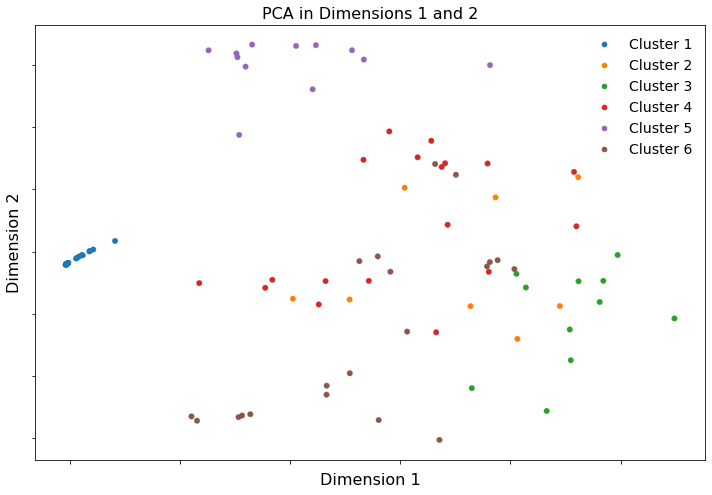

In [104]:
with plt.style.context(['seaborn-paper', PLOT_STYLE, {'legend.fontsize':14,
                                                      'legend.frameon':False}]):

    fig = plt.figure(figsize=(12,8))
    ax = fig.add_subplot(111)
    
    ax = plot_component_embedding(pca_12, clusters=clusters, ax=ax);
    
    plt.title('PCA in Dimensions 1 and 2', fontsize=16)
    #fig.savefig('./figures/figure_3_clustering.eps', bbox_inches='tight')

## 1st and 3rd dims

In [97]:
pca_13 = []
for one, two in zip(pca_0,pca_2):
    zipped = [one,two]
    pca_13.append(zipped)

In [98]:
pca_13 = np.array(pca_13)

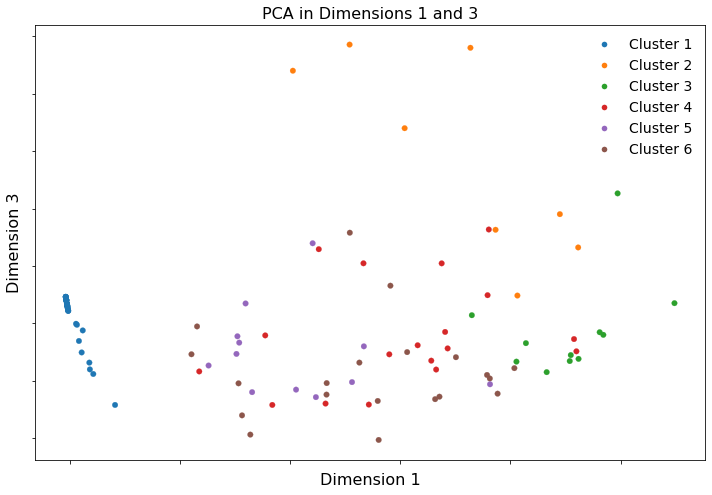

In [105]:
with plt.style.context(['seaborn-paper', PLOT_STYLE, {'legend.fontsize':14,
                                                      'legend.frameon':False}]):

    fig = plt.figure(figsize=(12,8))
    ax = fig.add_subplot(111)
    
    ax = plot_component_embedding(pca_13, clusters=clusters, ax=ax);
    ax.set_xlabel('Dimension 1')
    ax.set_ylabel('Dimension 3')
    plt.title('PCA in Dimensions 1 and 3', fontsize=16)
    #fig.savefig('./figures/figure_3_clustering.eps', bbox_inches='tight')

## 2nd and 3rd dims

In [100]:
pca_23 = []
for one, two in zip(pca_1,pca_2):
    zipped = [one,two]
    pca_23.append(zipped)

In [101]:
pca_23 = np.array(pca_23)

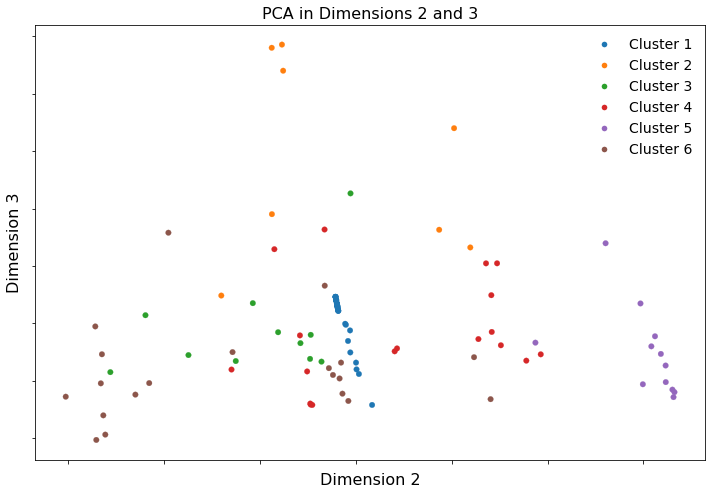

In [106]:
with plt.style.context(['seaborn-paper', PLOT_STYLE, {'legend.fontsize':14,
                                                      'legend.frameon':False}]):

    fig = plt.figure(figsize=(12,8))
    ax = fig.add_subplot(111)
    
    ax = plot_component_embedding(pca_23, clusters=clusters, ax=ax);
    ax.set_xlabel('Dimension 2')
    ax.set_ylabel('Dimension 3')
    plt.title('PCA in Dimensions 2 and 3', fontsize=16)
    #fig.savefig('./figures/figure_3_clustering.eps', bbox_inches='tight')

Cluster 1 and cluster 5 are ellipsiodal?? 

In [61]:
pca_components = pd.DataFrame([features.columns[pd.Series(PCA.components_[0]).abs().nlargest(3).index],
                               features.columns[pd.Series(PCA.components_[1]).abs().nlargest(3).index],
                               features.columns[pd.Series(PCA.components_[2]).abs().nlargest(3).index],
                               ]).T
pca_components.columns = ['Component 1 ({:.0f}%)'.format(100*PCA.explained_variance_ratio_[0]), 
                          'Component 2 ({:.0f}%)'.format(100*PCA.explained_variance_ratio_[1]),
                          'Component 3 ({:.0f}%)'.format(100*PCA.explained_variance_ratio_[2]),
                          ]
pca_components = pca_components.rename(index={0: '1', 1:'2', 2:'3'})

pca_components

,Component 1 (69%),Component 2 (13%),Component 3 (9%)
1,motif_entropy,imbalance_oi,clustering_coefficient
2,activity,●|○,activity
3,●|○,imbalance_oo,imbalance_oo


In [62]:
print(pca_components.to_latex())

\begin{tabular}{llll}
\toprule
{} & Component 1 (69\%) & Component 2 (13\%) &        Component 3 (9\%) \\
\midrule
1 &     motif\_entropy &      imbalance\_oi &  clustering\_coefficient \\
2 &          activity &               ●|○ &                activity \\
3 &               ●|○ &      imbalance\_oo &            imbalance\_oo \\
\bottomrule
\end{tabular}




# Evolution Over Time

In [54]:
filtered.add_cluster_assignments(clusters)

In [62]:
for cluster in sorted(filtered.events_meta.cluster.unique()):
        print(cluster)
        events = filtered.events[filtered.events_meta.cluster == cluster] 

0
1
2
3
4
5
6


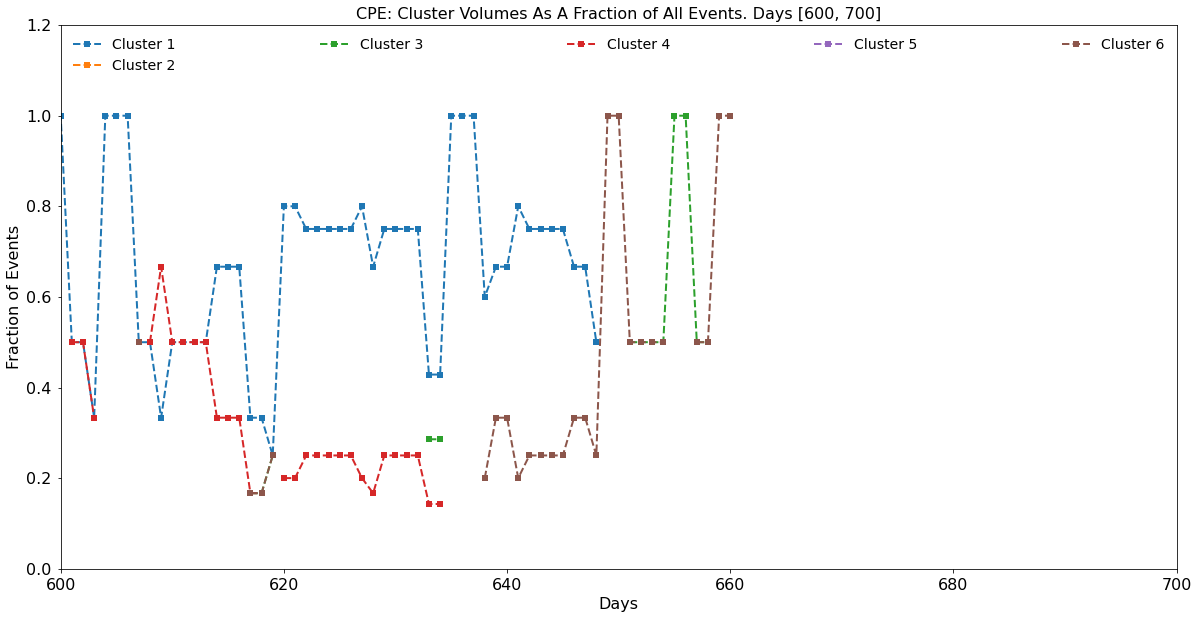

In [89]:

from eventgraphs.plotting import plot_cluster_timeseries

with plt.style.context(['seaborn-paper', PLOT_STYLE, {'legend.fontsize':14,
                                                      'legend.frameon':False}]):

    fig = plt.figure(figsize=(20,10))
    ax = fig.add_subplot(111)
    

    plot_cluster_timeseries(filtered, interval_width=1, normalized=True, plot_unclustered=False, ax=ax);

    ax.set_xlabel("Days")
    ax.set_ylabel("Fraction of Events")
    ax.set_title('CPE: Cluster Volumes As A Fraction of All Events. Days [600, 700]', fontsize=16)
    ax.set_xlim(600, 700) # the first 100 days
    ax.set_ylim(0.0,1.2)

    #ax.set_xticks(np.linspace(-0.5,23.5,13))
    #ax.set_xticklabels([pd.to_datetime(x, unit='d').strftime("%D") for x in np.linspace(0,24,13)])

    legend = ax.legend(ncol=5, mode='expand')
    [x.set_text('Cluster {}'.format(x.get_text())) for x in legend.get_texts()]

    fig.savefig('./figures/figure_6_evolution.pdf', bbox_inches='tight')
plt.show()

# Dendrogram

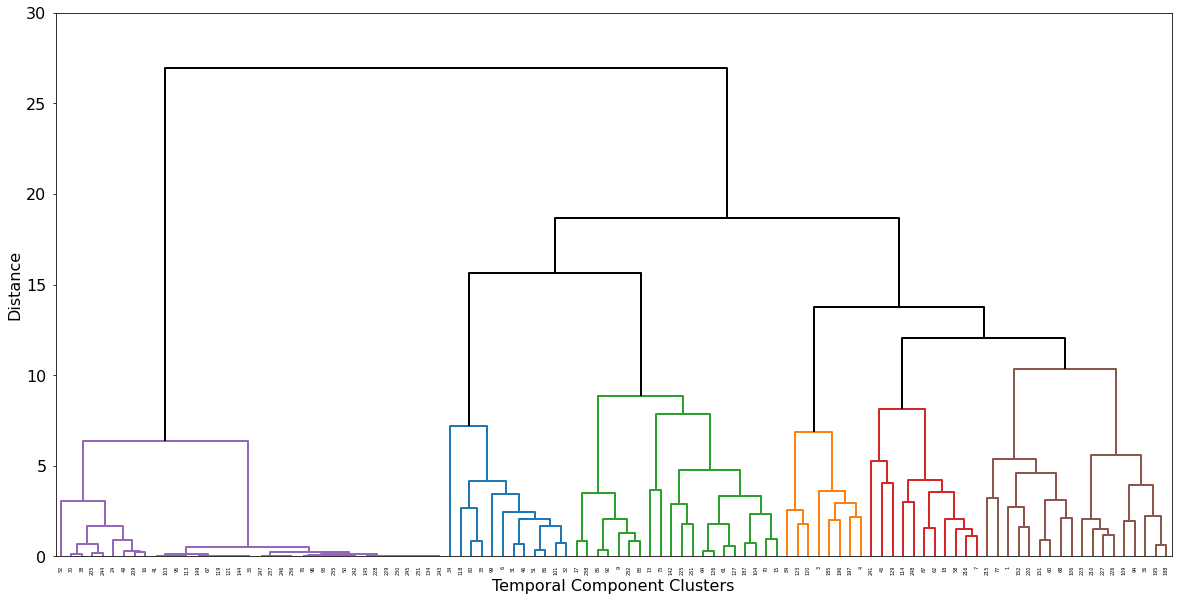

In [101]:

from eventgraphs.clustering import generate_distance_matrix, generate_linkage, find_clusters
from eventgraphs.plotting import plot_component_dendrogram
from scipy.cluster.hierarchy import set_link_color_palette

distances = generate_distance_matrix(rs_features)
Z = generate_linkage(distances)

with plt.style.context(['seaborn-paper', PLOT_STYLE]):

    fig = plt.figure(figsize=(20,10))
    ax = fig.add_subplot(111)

    set_link_color_palette(['C4', 'C0', 'C2', 'C1', 'C3','C5'])
    
    den_labels = den_clust.index

    plot_component_dendrogram(Z, dendrogram_kwargs={'leaf_rotation': 90, 
                                 'labels': den_labels, 
                                 'distance_sort': False, 
                                 'count_sort': True,
                                 'above_threshold_color': 'k', 'color_threshold': 12}, ax=ax);

    ax.set_xlabel("Temporal Component Clusters")
    ax.set_ylim(0,30)
    

    fig.savefig('./figures/figure_4_hierarchy.eps', bbox_inches='tight')

# Time shuffled data 

In [108]:
# Load feature vectors from precomputed ensembles
feature_store = pd.read_csv('./data/random/ensemble_features.csv', header=0, index_col=0)
scale_feature_store = pd.read_csv('./data/random/ensemble_scale_features.csv', header=0, index_col=0)
complete = pd.read_csv('./data/random/ensemble_complete.csv', header=0, index_col=0)

In [109]:
sample_vector = feature_store['sample']

feature_store = feature_store.fillna(0)
feature_store
scale_feature_store = scale_feature_store.fillna(0)
complete = complete.fillna(0)

In [110]:
from sklearn.preprocessing import Normalizer
# Rescale
rs_feature_store = Normalizer().fit_transform(feature_store)
rs_feature_store = pd.DataFrame(rs_feature_store, index=feature_store.index, columns=feature_store.columns)

rs_complete = Normalizer().fit_transform(complete)
rs_complete = pd.DataFrame(rs_complete, index=complete.index, columns=complete.columns)

In [111]:
distances = {}
for sample, group in rs_feature_store.groupby(sample_vector):
    distances[sample] = ((group - rs_complete.loc[sample])**2).sum(axis=1)

In [112]:
# Actual data distance
full, _ = generate_features({'full': filtered}, feature_spec=FEATURE_SPEC)

rs_full = Normalizer().fit_transform(full)
rs_full = pd.DataFrame(rs_full, index=full.index, columns=full.columns)
rs_full = rs_full.drop('reciprocity_ratio', axis=1)
actual_distance = (rs_features.subtract(rs_full.T.values[:,0])**2).sum(axis=1)

In [113]:
actual_distance.mean(), actual_distance.var(), len(actual_distance)

(1.4503324054163726, 0.04604926127128828, 106)

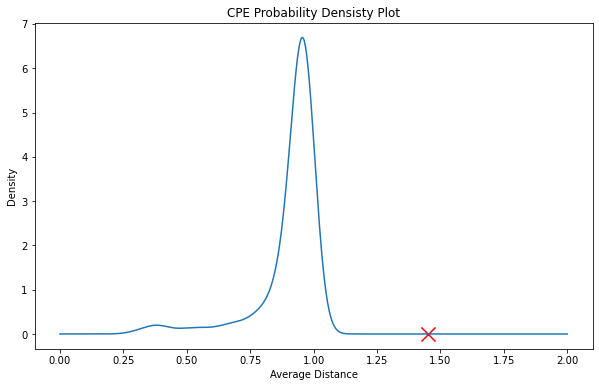

In [114]:
from scipy.stats import gaussian_kde

d = pd.Series([d.mean() for d in distances.values()])
kde = gaussian_kde(d)

x = np.linspace(0, 2,1000)

y = kde.evaluate(x)

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

ax.plot(x,y)
ax.scatter([actual_distance.mean()],[0], marker='x', color='r', s=200)

ax.set_xlabel("Average Distance")
ax.set_ylabel("Density")
ax.set_title('CPE Probability Densisty Plot')

plt.show()
fig.savefig('./figures/figure_8_distance.eps', bbox_inches='tight')

In [85]:
# z-score
d.mean(), d.std(), (actual_distance.mean() - d.mean())/ d.std()

(0.9063343595648338, 0.12545244195841915, 4.406909340087261)